# Einheit 4 - Trainieren eines Objekterkennung Algorithmus

Unser Ziel heute ist es, die folgenden Kategorien zu erkennen:
- Dog (Hund)
- Butterfly (Schmetterling)
- Filing Cabinet (Aktenschrank)
- Beaker (Messbecher)
- Laptop 
- Plastic Bag (Plastik Sack)
- Hotdog
- Banana (Banane)
- Bee (Biene)
- WaterBottle (Wasserflasche)

Das Maximum was hierfür erreichbar ist könnt ihr hier nachsehen: https://paperswithcode.com/sota/image-classification-on-imagenet .
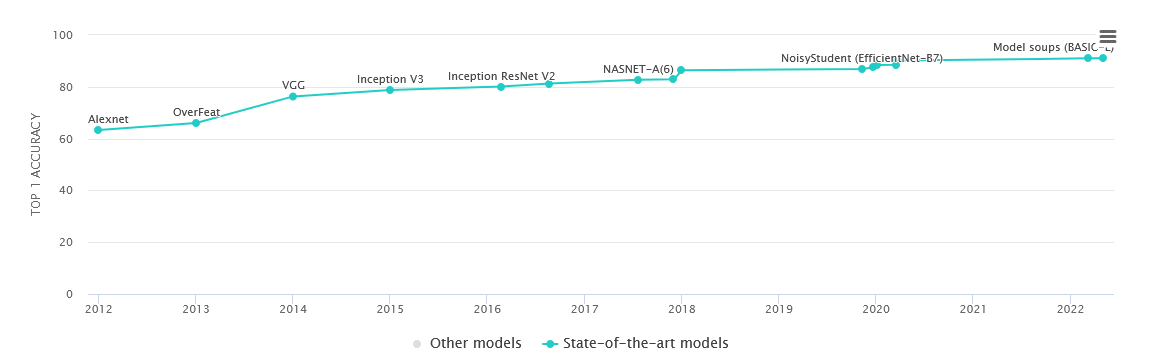

Wir arbeiten aber mit nur den 10 Objektarten, um weniger Daten betrachten zu müssen.

Hierfür müssen wir als erstes wieder die benötigten Module installieren:

In [1]:
# Installation der benötigten Module
!pip install torch torchvision
!pip install tqdm
!pip install seaborn scikit-learn
!pip install opencv-python matplotlib numpy

In [2]:
# Hier werden die notwendigen, nun installierten Module eingebunden damit wir diese später verwenden können
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from PIL import Image
import time

import models
import helpers

# ==== CONFIGURATION ====
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

DATA_DIR = "imagenet"  # Ordner wo die Bilder für das Training des Modells hinterlegt werden
NUM_EPOCHS = 50  # Wie lange wird unser Modell trainiert
LEARNING_RATE = 0.0001  # Wie stark soll sich das Modell bei Fehlern verändern
BATCH_SIZE = 64  
NUM_WORKERS = 8
NUM_CLASSES = 10  # Wie viele verschiedene Objekte versuchen wir voneinander zu unterscheiden

In [3]:
train_loader, test_loader, class_labels = helpers.get_dataloaders(DATA_DIR, BATCH_SIZE, NUM_WORKERS)

Loading training data into RAM...
Loading testing data into RAM...
Data is now fully loaded into RAM!


## Einfaches Erkennungsnetzwerk

Um Objekte zu erkennen verwenden wir so genannte Faltungsneuronale Netzwerke oder Vision Transformer. Ihr habt bereits in Einheit 2 einige dieser Modelle verwendet, wie VGG, ResNet, Clip und MaskRCNN. Heute werdet ihr ein sehr einfaches Modell selbst trainieren und herausfinden welche Probleme hierbei auftreten können.

Befor wir starten ist es wichtig zu überdenken, mit welchem Wert wir uns vergleichen wollen. Bei 10 verschiedenen Obejekttypen ist die minimale Genauigkeit eines Modelles 10%. 

**Frage: Warum ist das der Fall?**



Um ein einfaches Erkennungsnetzwerk zu trainieren müssen wir als erstes ein Modell auswählen. Ich habe euch mehrere Modelle zur Verfügung gestellt, am besten ist es aber immer mit einem "kleinem" Modell (sehr einfach) zu starten. Dieses Modell könnt Ihr über:

```
model = models.SmallCNN(NUM_CLASSES).to(DEVICE)
```

erstellen. Neuronale Netzwerke werden dadurch trainiert, indem wir diese über deren Fehler lernen lassen (Mathematisch ist das eine Funktion, welche wir ableiten und einen Schritt Richtung Nullpunkt gehen). Hierfür müssen wir eine Fehlerfunktion und die Art und Weise wie wir aus diesem Fehler lernen definieren. Das könnt ihr so machen:

```
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
```

Das Training findet für gewöhnlich in einer Schleife statt, welche so lange durchlaufen wird bis eine gewisse Zeit, die so genannten Epochen, abgelaufen sind. In einer jeden Epoche passiert immer das gleiche. Erst werden ein paar Daten gezogen und damit das Modell trainiert. Hierfür versucht das Modell diese korrekt zu erkennen und wenn dieses Fehler macht, wird es verändert. Danach werden Daten, welche das Modell nicht kennt, verwendet um das Modell zu testen. Mit den Ergebnissen dieses Testes wird das Modell NICHT trainiert. 

**Frage: Warum trennen wir das Training und das Testen auf und warum ist es wichtig das das Modell auf noch nie gesehenen Daten getestet wird?**

Danach speichert sich der Code ein paar Werte damit wir diese später ausgeben können und verstehen was hier passiert.

Starting Training...
Epoch 1/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 42.73batch/s]


Train Loss: 2.1590, Train Accuracy: 19.70%
Test Loss: 2.2039, Test Accuracy: 21.17%
Epoch 2/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 47.18batch/s]


Train Loss: 1.9811, Train Accuracy: 29.27%
Test Loss: 2.1012, Test Accuracy: 25.64%
Epoch 3/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 49.53batch/s]


Train Loss: 1.8823, Train Accuracy: 34.18%
Test Loss: 2.0157, Test Accuracy: 24.48%
Epoch 4/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 48.80batch/s]


Train Loss: 1.8082, Train Accuracy: 35.90%
Test Loss: 2.0042, Test Accuracy: 30.51%
Epoch 5/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.39batch/s]


Train Loss: 1.7430, Train Accuracy: 38.87%
Test Loss: 1.9878, Test Accuracy: 29.47%
Epoch 6/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 49.01batch/s]


Train Loss: 1.6912, Train Accuracy: 40.81%
Test Loss: 1.9937, Test Accuracy: 28.02%
Epoch 7/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 49.07batch/s]


Train Loss: 1.6439, Train Accuracy: 41.88%
Test Loss: 1.8678, Test Accuracy: 36.72%
Epoch 8/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 48.68batch/s]


Train Loss: 1.6049, Train Accuracy: 44.34%
Test Loss: 2.0544, Test Accuracy: 26.74%
Epoch 9/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 47.58batch/s]


Train Loss: 1.5574, Train Accuracy: 45.86%
Test Loss: 1.9477, Test Accuracy: 30.57%
Epoch 10/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 48.89batch/s]


Train Loss: 1.5276, Train Accuracy: 47.39%
Test Loss: 1.9044, Test Accuracy: 35.44%
Epoch 11/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 47.16batch/s]


Train Loss: 1.5008, Train Accuracy: 48.47%
Test Loss: 1.9498, Test Accuracy: 33.76%
Epoch 12/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 49.10batch/s]


Train Loss: 1.4647, Train Accuracy: 49.91%
Test Loss: 1.9371, Test Accuracy: 32.25%
Epoch 13/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 49.16batch/s]


Train Loss: 1.4277, Train Accuracy: 50.85%
Test Loss: 1.8571, Test Accuracy: 36.66%
Epoch 14/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 48.86batch/s]


Train Loss: 1.4032, Train Accuracy: 51.53%
Test Loss: 1.8875, Test Accuracy: 37.53%
Epoch 15/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 49.01batch/s]


Train Loss: 1.3622, Train Accuracy: 53.52%
Test Loss: 1.9186, Test Accuracy: 34.40%
Epoch 16/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.77batch/s]


Train Loss: 1.3431, Train Accuracy: 54.10%
Test Loss: 1.9291, Test Accuracy: 34.98%
Epoch 17/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 47.11batch/s]


Train Loss: 1.3066, Train Accuracy: 55.98%
Test Loss: 1.7289, Test Accuracy: 44.20%
Epoch 18/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 48.56batch/s]


Train Loss: 1.2754, Train Accuracy: 56.66%
Test Loss: 1.9482, Test Accuracy: 33.82%
Epoch 19/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 48.38batch/s]


Train Loss: 1.2553, Train Accuracy: 57.20%
Test Loss: 2.1089, Test Accuracy: 30.28%
Epoch 20/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.72batch/s]


Train Loss: 1.2143, Train Accuracy: 59.51%
Test Loss: 1.9100, Test Accuracy: 36.48%
Epoch 21/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 47.33batch/s]


Train Loss: 1.1785, Train Accuracy: 60.55%
Test Loss: 1.7725, Test Accuracy: 42.58%
Epoch 22/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 45.17batch/s]


Train Loss: 1.1569, Train Accuracy: 61.23%
Test Loss: 2.1133, Test Accuracy: 31.32%
Epoch 23/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 48.59batch/s]


Train Loss: 1.1326, Train Accuracy: 62.27%
Test Loss: 1.9846, Test Accuracy: 36.95%
Epoch 24/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 48.77batch/s]


Train Loss: 1.0938, Train Accuracy: 63.81%
Test Loss: 1.8955, Test Accuracy: 39.62%
Epoch 25/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 44.04batch/s]


Train Loss: 1.0720, Train Accuracy: 65.46%
Test Loss: 2.1370, Test Accuracy: 32.66%
Epoch 26/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 40.18batch/s]


Train Loss: 1.0295, Train Accuracy: 65.78%
Test Loss: 2.1027, Test Accuracy: 33.35%
Epoch 27/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.53batch/s]


Train Loss: 1.0041, Train Accuracy: 67.36%
Test Loss: 2.0261, Test Accuracy: 36.77%
Epoch 28/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 43.03batch/s]


Train Loss: 0.9877, Train Accuracy: 67.32%
Test Loss: 2.1725, Test Accuracy: 32.31%
Epoch 29/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 44.53batch/s]


Train Loss: 0.9460, Train Accuracy: 69.42%
Test Loss: 1.8356, Test Accuracy: 44.08%
Epoch 30/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 47.53batch/s]


Train Loss: 0.9283, Train Accuracy: 70.15%
Test Loss: 2.0701, Test Accuracy: 36.02%
Epoch 31/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 40.60batch/s]


Train Loss: 0.8884, Train Accuracy: 71.29%
Test Loss: 2.3713, Test Accuracy: 27.20%
Epoch 32/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 44.65batch/s]


Train Loss: 0.8659, Train Accuracy: 72.45%
Test Loss: 2.1428, Test Accuracy: 35.79%
Epoch 33/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 33.35batch/s]


Train Loss: 0.8388, Train Accuracy: 73.69%
Test Loss: 2.3409, Test Accuracy: 28.25%
Epoch 34/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 38.36batch/s]


Train Loss: 0.8112, Train Accuracy: 74.65%
Test Loss: 2.1851, Test Accuracy: 34.45%
Epoch 35/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 38.82batch/s]


Train Loss: 0.7799, Train Accuracy: 76.00%
Test Loss: 2.0718, Test Accuracy: 37.82%
Epoch 36/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 44.68batch/s]


Train Loss: 0.7726, Train Accuracy: 75.70%
Test Loss: 2.1027, Test Accuracy: 37.88%
Epoch 37/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.59batch/s]


Train Loss: 0.7337, Train Accuracy: 77.20%
Test Loss: 2.3885, Test Accuracy: 28.83%
Epoch 38/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.28batch/s]


Train Loss: 0.7064, Train Accuracy: 78.98%
Test Loss: 2.3185, Test Accuracy: 32.19%
Epoch 39/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.64batch/s]


Train Loss: 0.6851, Train Accuracy: 79.66%
Test Loss: 2.2470, Test Accuracy: 34.11%
Epoch 40/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.25batch/s]


Train Loss: 0.6555, Train Accuracy: 80.28%
Test Loss: 2.1782, Test Accuracy: 39.73%
Epoch 41/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 45.77batch/s]


Train Loss: 0.6410, Train Accuracy: 80.63%
Test Loss: 2.2500, Test Accuracy: 37.41%
Epoch 42/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.59batch/s]


Train Loss: 0.6094, Train Accuracy: 82.35%
Test Loss: 2.2913, Test Accuracy: 35.90%
Epoch 43/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.75batch/s]


Train Loss: 0.5878, Train Accuracy: 82.71%
Test Loss: 2.2575, Test Accuracy: 38.17%
Epoch 44/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.12batch/s]


Train Loss: 0.5653, Train Accuracy: 83.39%
Test Loss: 2.2681, Test Accuracy: 38.98%
Epoch 45/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 43.73batch/s]


Train Loss: 0.5378, Train Accuracy: 84.67%
Test Loss: 2.5647, Test Accuracy: 29.99%
Epoch 46/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 43.78batch/s]


Train Loss: 0.5141, Train Accuracy: 85.41%
Test Loss: 2.4264, Test Accuracy: 34.45%
Epoch 47/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 44.95batch/s]


Train Loss: 0.4954, Train Accuracy: 86.36%
Test Loss: 2.4860, Test Accuracy: 35.15%
Epoch 48/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 44.08batch/s]


Train Loss: 0.4768, Train Accuracy: 87.70%
Test Loss: 2.5999, Test Accuracy: 31.21%
Epoch 49/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 44.13batch/s]


Train Loss: 0.4644, Train Accuracy: 87.50%
Test Loss: 2.3861, Test Accuracy: 38.23%
Epoch 50/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 45.48batch/s]


Train Loss: 0.4449, Train Accuracy: 87.86%
Test Loss: 2.4569, Test Accuracy: 36.31%
Training Complete!


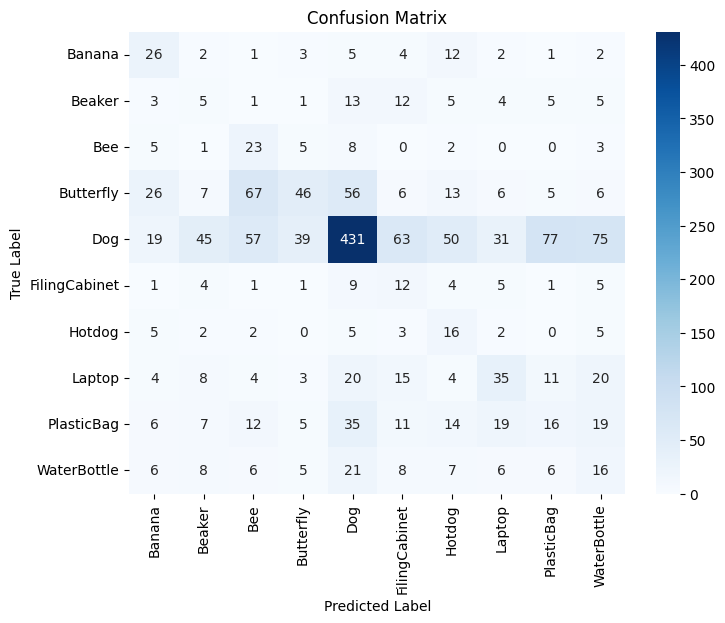

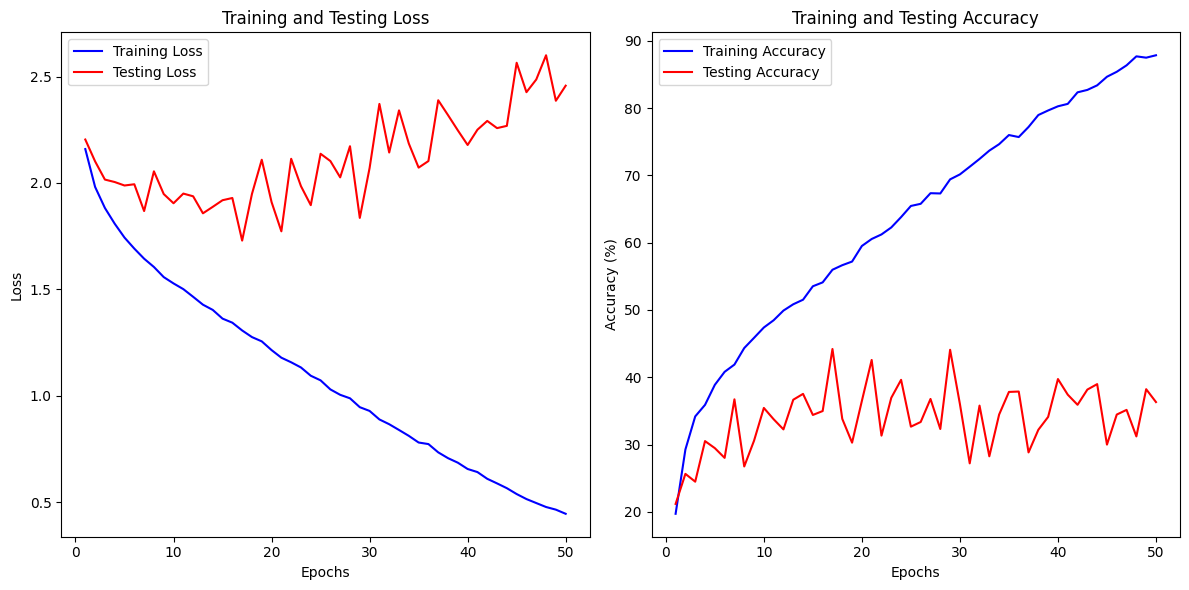

In [4]:
# Definition des kleinen Modells und dessen Fehler und Updatefunktion
model = models.SmallCNN(NUM_CLASSES).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# ==== TRAINING SCHLEIFE ====
print("Starting Training...")
train_losses, train_accuracies = [], []
test_losses, test_accuracies = [], []
for epoch in range(NUM_EPOCHS):  # Wir machen das so lange, bis wir alle Epochen durchgemacht haben
    print(f"Epoch {epoch+1}/{NUM_EPOCHS}")
    
    # Trainieren auf der Basis der Trainingsdaten
    train_loss, train_acc = helpers.train(model, train_loader, criterion, optimizer, DEVICE)
    # Testen anhand der dem Modell unbekannten Testdaten
    test_loss, test_acc, all_preds, all_labels = helpers.test(model, test_loader, criterion, DEVICE)

    # Speichern und Ausgeben von Ergebnissen
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)
    
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%")
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")


print("Training Complete!")

# Darstellen der Ergebnisse
helpers.plot_confusion_matrix(all_labels, all_preds, classes=class_labels)
helpers.plot_training_history(train_losses, test_losses, train_accuracies, test_accuracies)
# Speichern des Modells für später
helpers.safe_model(model, "best_small_cnn.pth")

Nach dem Training gibt uns der Code die Verwirrungsmatrix und die Trainingskurven aus: 

```
helpers.plot_confusion_matrix(all_labels, all_preds, classes=class_labels)
helpers.plot_training_history(train_losses, test_losses, train_accuracies, test_accuracies)
```

Die Verwirrungsmatrix ist verwirrend, im Grunde zeigt diese aber nur welche Objekte, wie erkannt wurden. Auf der y Achse wird angezeigt, was ein Objekt sein sollte, auf der x Achse, als was dieses Obejkt tatsächlich erkannt wurde. Ein perfektes Modell hat also nur Zahlen in der Diagonale und alle anderen Zahlen sollten 0 sein.

Die Trainingskurven zeigen euch an wie das Modell über die Zeit lernt. Das linke Bild zeigt euch den Fehler an (sollte über die Zeit weniger werden). Blau ist der Fehler basierend auf den Trainingsdaten, rot der Fehler basierend auf den Testdaten. Das rechte Bild zeigt euch die Genauigkeit des Modelles an (sollte über die Zeit mehr werden).

**Frage: Was denkt ihr könnte ein Grund sein, das die blaue Kurven besser werden, die roten aber nicht? Was bedeuted das?**

...

...

...

...

...

...

...

...

...

...

Um dieses Problem zu lösen können wir das Modell bestrafen, wenn es Sachen auswendig lernt. Hierfür verwenden wir so genannte Regulaisierung. Ihr könnt Regularisierung beim Trainer des Modells angeben: 

```
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=0.001)
```

Hier bestraft der so genannte weight_decay Parameter das Modell wenn dieses etwas auswendig lernt. Je höher dieser gesetzt wird, umso strenger sind wir hier. Aber Achtung! Wenn dieser Parameter zu hoch gesetzt wird, kann das Modell gar nichts mehr lernen. Zusätzlich verwenden wir so genannten Dropout (zu sehen in models.py):

```
self.dropout = nn.Dropout(0.5)
```

Den Rest des Codes lassen wir gleich


Starting Training...
Epoch 1/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 44.91batch/s]


Train Loss: 2.2123, Train Accuracy: 18.21%
Test Loss: 2.2306, Test Accuracy: 17.05%
Epoch 2/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.14batch/s]


Train Loss: 2.1209, Train Accuracy: 22.14%
Test Loss: 2.1174, Test Accuracy: 19.95%
Epoch 3/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 45.90batch/s]


Train Loss: 2.0613, Train Accuracy: 25.87%
Test Loss: 2.0692, Test Accuracy: 31.26%
Epoch 4/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.39batch/s]


Train Loss: 2.0205, Train Accuracy: 26.65%
Test Loss: 2.0987, Test Accuracy: 25.52%
Epoch 5/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.33batch/s]


Train Loss: 1.9829, Train Accuracy: 28.67%
Test Loss: 2.0318, Test Accuracy: 30.51%
Epoch 6/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 45.80batch/s]


Train Loss: 1.9502, Train Accuracy: 29.45%
Test Loss: 2.0067, Test Accuracy: 32.37%
Epoch 7/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 44.18batch/s]


Train Loss: 1.9185, Train Accuracy: 29.43%
Test Loss: 1.9720, Test Accuracy: 33.87%
Epoch 8/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 42.75batch/s]


Train Loss: 1.8991, Train Accuracy: 31.08%
Test Loss: 2.0178, Test Accuracy: 27.38%
Epoch 9/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 44.24batch/s]


Train Loss: 1.8618, Train Accuracy: 32.00%
Test Loss: 1.9534, Test Accuracy: 33.82%
Epoch 10/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 44.79batch/s]


Train Loss: 1.8366, Train Accuracy: 33.06%
Test Loss: 1.8851, Test Accuracy: 35.21%
Epoch 11/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 43.53batch/s]


Train Loss: 1.8135, Train Accuracy: 33.66%
Test Loss: 1.8503, Test Accuracy: 39.04%
Epoch 12/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.50batch/s]


Train Loss: 1.8080, Train Accuracy: 33.84%
Test Loss: 2.0049, Test Accuracy: 25.99%
Epoch 13/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.39batch/s]


Train Loss: 1.7898, Train Accuracy: 33.96%
Test Loss: 1.8771, Test Accuracy: 36.77%
Epoch 14/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 44.09batch/s]


Train Loss: 1.7514, Train Accuracy: 35.78%
Test Loss: 1.8249, Test Accuracy: 38.52%
Epoch 15/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 45.54batch/s]


Train Loss: 1.7277, Train Accuracy: 36.33%
Test Loss: 1.8895, Test Accuracy: 35.03%
Epoch 16/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 42.23batch/s]


Train Loss: 1.7236, Train Accuracy: 36.77%
Test Loss: 1.8572, Test Accuracy: 35.61%
Epoch 17/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 44.61batch/s]


Train Loss: 1.7033, Train Accuracy: 37.73%
Test Loss: 1.8165, Test Accuracy: 38.69%
Epoch 18/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 45.72batch/s]


Train Loss: 1.6801, Train Accuracy: 37.97%
Test Loss: 1.8482, Test Accuracy: 36.02%
Epoch 19/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.14batch/s]


Train Loss: 1.6803, Train Accuracy: 39.17%
Test Loss: 1.8104, Test Accuracy: 37.76%
Epoch 20/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.14batch/s]


Train Loss: 1.6617, Train Accuracy: 39.55%
Test Loss: 1.9199, Test Accuracy: 33.06%
Epoch 21/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.25batch/s]


Train Loss: 1.6356, Train Accuracy: 40.51%
Test Loss: 1.7086, Test Accuracy: 42.05%
Epoch 22/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 45.59batch/s]


Train Loss: 1.6360, Train Accuracy: 39.73%
Test Loss: 1.7493, Test Accuracy: 40.60%
Epoch 23/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 45.82batch/s]


Train Loss: 1.6059, Train Accuracy: 41.13%
Test Loss: 1.8814, Test Accuracy: 34.45%
Epoch 24/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 45.88batch/s]


Train Loss: 1.6221, Train Accuracy: 41.35%
Test Loss: 1.7506, Test Accuracy: 40.43%
Epoch 25/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.23batch/s]


Train Loss: 1.5604, Train Accuracy: 42.42%
Test Loss: 1.9553, Test Accuracy: 29.23%
Epoch 26/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.31batch/s]


Train Loss: 1.5531, Train Accuracy: 43.94%
Test Loss: 1.8039, Test Accuracy: 37.94%
Epoch 27/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.12batch/s]


Train Loss: 1.5589, Train Accuracy: 42.80%
Test Loss: 1.7871, Test Accuracy: 39.21%
Epoch 28/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.14batch/s]


Train Loss: 1.5302, Train Accuracy: 43.80%
Test Loss: 1.7978, Test Accuracy: 38.92%
Epoch 29/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.25batch/s]


Train Loss: 1.5465, Train Accuracy: 43.16%
Test Loss: 1.8190, Test Accuracy: 35.67%
Epoch 30/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 45.22batch/s]


Train Loss: 1.5078, Train Accuracy: 44.66%
Test Loss: 1.8614, Test Accuracy: 32.37%
Epoch 31/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 45.25batch/s]


Train Loss: 1.5090, Train Accuracy: 43.78%
Test Loss: 1.7839, Test Accuracy: 39.04%
Epoch 32/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 45.82batch/s]


Train Loss: 1.4845, Train Accuracy: 44.76%
Test Loss: 1.8010, Test Accuracy: 37.53%
Epoch 33/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 45.48batch/s]


Train Loss: 1.4619, Train Accuracy: 45.76%
Test Loss: 1.7909, Test Accuracy: 38.57%
Epoch 34/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.23batch/s]


Train Loss: 1.4499, Train Accuracy: 46.72%
Test Loss: 1.8833, Test Accuracy: 34.86%
Epoch 35/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.12batch/s]


Train Loss: 1.4512, Train Accuracy: 47.29%
Test Loss: 1.8077, Test Accuracy: 37.59%
Epoch 36/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.31batch/s]


Train Loss: 1.4291, Train Accuracy: 47.95%
Test Loss: 1.7349, Test Accuracy: 40.02%
Epoch 37/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.25batch/s]


Train Loss: 1.4098, Train Accuracy: 47.65%
Test Loss: 1.8404, Test Accuracy: 35.44%
Epoch 38/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 45.25batch/s]


Train Loss: 1.3818, Train Accuracy: 47.87%
Test Loss: 1.7547, Test Accuracy: 38.28%
Epoch 39/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 45.38batch/s]


Train Loss: 1.3969, Train Accuracy: 48.09%
Test Loss: 1.8148, Test Accuracy: 37.12%
Epoch 40/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.12batch/s]


Train Loss: 1.3515, Train Accuracy: 50.03%
Test Loss: 1.8885, Test Accuracy: 35.38%
Epoch 41/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.12batch/s]


Train Loss: 1.3451, Train Accuracy: 49.79%
Test Loss: 1.7986, Test Accuracy: 37.94%
Epoch 42/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.14batch/s]


Train Loss: 1.3538, Train Accuracy: 49.03%
Test Loss: 1.8686, Test Accuracy: 34.74%
Epoch 43/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.12batch/s]


Train Loss: 1.3235, Train Accuracy: 50.63%
Test Loss: 1.8763, Test Accuracy: 35.44%
Epoch 44/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.39batch/s]


Train Loss: 1.2995, Train Accuracy: 51.51%
Test Loss: 1.8077, Test Accuracy: 37.53%
Epoch 45/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.20batch/s]


Train Loss: 1.2867, Train Accuracy: 53.08%
Test Loss: 1.9312, Test Accuracy: 33.41%
Epoch 46/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 45.72batch/s]


Train Loss: 1.2837, Train Accuracy: 52.49%
Test Loss: 1.8290, Test Accuracy: 36.77%
Epoch 47/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 45.66batch/s]


Train Loss: 1.2777, Train Accuracy: 51.75%
Test Loss: 1.7034, Test Accuracy: 42.81%
Epoch 48/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.17batch/s]


Train Loss: 1.2434, Train Accuracy: 54.12%
Test Loss: 1.7920, Test Accuracy: 38.75%
Epoch 49/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.33batch/s]


Train Loss: 1.2304, Train Accuracy: 53.96%
Test Loss: 1.8054, Test Accuracy: 39.10%
Epoch 50/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 46.31batch/s]


Train Loss: 1.2152, Train Accuracy: 54.08%
Test Loss: 1.9699, Test Accuracy: 34.57%
Training Complete!


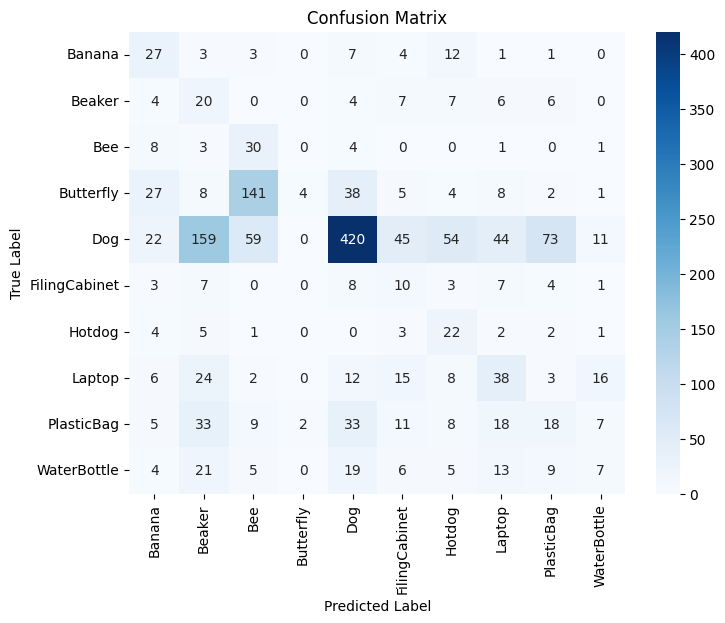

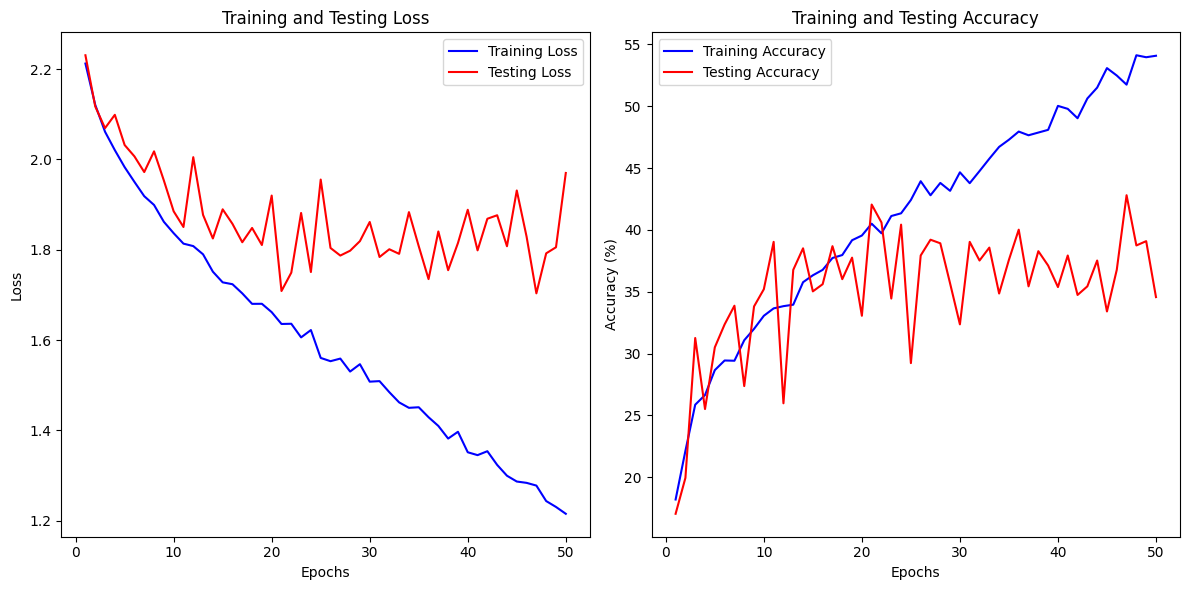

In [5]:
model = models.SmallRegCNN(NUM_CLASSES).to(DEVICE)  # Hier verwenden wir nun auch ein Modell mit Dropout
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=0.001)  # Hinzufügen der Regularisierung

# ==== TRAINING SCHLEIFE ====
print("Starting Training...")
train_losses, train_accuracies = [], []
test_losses, test_accuracies = [], []
for epoch in range(NUM_EPOCHS):
    print(f"Epoch {epoch+1}/{NUM_EPOCHS}")
    
    # Train & test
    train_loss, train_acc = helpers.train(model, train_loader, criterion, optimizer, DEVICE)
    test_loss, test_acc, all_preds, all_labels = helpers.test(model, test_loader, criterion, DEVICE)

    # Ergebnisse speichern
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)
    
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%")
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

print("Training Complete!")

# Darstellen der Ergebnisse
helpers.plot_confusion_matrix(all_labels, all_preds, classes=class_labels)
helpers.plot_training_history(train_losses, test_losses, train_accuracies, test_accuracies)
# Speichern des Modells für später
helpers.safe_model(model, "best_small_reg_cnn.pth")

Die rote und Blaue Linie sind jetzt um einiges ähnlicher und auch die rote Linie bewegt sich jetzt schon mal, zu mindest teilweise, in die richtige Richtung. Aber da können wir noch mehr rausholen! Grundsätzlich können tiefere Netzwerke besser Objekte erkennen, da diese mehr Möglichkeiten haben sich komplizierte Dinge zu merken. Außerdem können tiefere Netzwerke sich auf sinnvolle Muster konzentrieren, wärend seichte Netzwerke einfache Muster auswendig lernen. Das Modell:

```
model = models.CNNReg(NUM_CLASSES).to(DEVICE)
```

ist ein tieferes Modell mit Regularisierung. Probiert das mal aus!

Starting Training...
Epoch 1/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.84batch/s]


Train Loss: 2.3032, Train Accuracy: 10.52%
Test Loss: 2.3220, Test Accuracy: 3.13%
Epoch 2/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.30batch/s]


Train Loss: 2.2886, Train Accuracy: 12.56%
Test Loss: 2.3062, Test Accuracy: 4.76%
Epoch 3/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.11batch/s]


Train Loss: 2.2560, Train Accuracy: 14.73%
Test Loss: 2.2907, Test Accuracy: 5.39%
Epoch 4/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.94batch/s]


Train Loss: 2.2360, Train Accuracy: 16.31%
Test Loss: 2.2772, Test Accuracy: 5.86%
Epoch 5/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.44batch/s]


Train Loss: 2.2298, Train Accuracy: 16.05%
Test Loss: 2.2570, Test Accuracy: 5.92%
Epoch 6/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.36batch/s]


Train Loss: 2.2089, Train Accuracy: 16.31%
Test Loss: 2.2532, Test Accuracy: 6.32%
Epoch 7/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.37batch/s]


Train Loss: 2.1893, Train Accuracy: 18.55%
Test Loss: 2.2417, Test Accuracy: 6.61%
Epoch 8/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.41batch/s]


Train Loss: 2.1795, Train Accuracy: 18.13%
Test Loss: 2.2289, Test Accuracy: 6.38%
Epoch 9/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.39batch/s]


Train Loss: 2.1515, Train Accuracy: 18.73%
Test Loss: 2.2475, Test Accuracy: 6.44%
Epoch 10/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.75batch/s]


Train Loss: 2.1399, Train Accuracy: 20.12%
Test Loss: 2.2032, Test Accuracy: 6.55%
Epoch 11/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.24batch/s]


Train Loss: 2.1375, Train Accuracy: 20.76%
Test Loss: 2.2024, Test Accuracy: 6.61%
Epoch 12/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.11batch/s]


Train Loss: 2.1295, Train Accuracy: 21.06%
Test Loss: 2.1826, Test Accuracy: 7.37%
Epoch 13/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.04batch/s]


Train Loss: 2.1073, Train Accuracy: 21.88%
Test Loss: 2.1672, Test Accuracy: 8.41%
Epoch 14/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.96batch/s]


Train Loss: 2.0858, Train Accuracy: 22.12%
Test Loss: 2.1490, Test Accuracy: 8.70%
Epoch 15/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.96batch/s]


Train Loss: 2.0755, Train Accuracy: 22.30%
Test Loss: 2.1280, Test Accuracy: 8.87%
Epoch 16/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.09batch/s]


Train Loss: 2.0588, Train Accuracy: 23.30%
Test Loss: 2.1498, Test Accuracy: 9.45%
Epoch 17/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.99batch/s]


Train Loss: 2.0551, Train Accuracy: 23.06%
Test Loss: 2.1256, Test Accuracy: 10.56%
Epoch 18/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.31batch/s]


Train Loss: 2.0341, Train Accuracy: 24.00%
Test Loss: 2.1086, Test Accuracy: 11.08%
Epoch 19/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.17batch/s]


Train Loss: 2.0331, Train Accuracy: 24.02%
Test Loss: 2.1023, Test Accuracy: 10.32%
Epoch 20/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.27batch/s]


Train Loss: 2.0203, Train Accuracy: 24.96%
Test Loss: 2.0899, Test Accuracy: 9.63%
Epoch 21/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.97batch/s]


Train Loss: 2.0162, Train Accuracy: 24.22%
Test Loss: 2.0984, Test Accuracy: 11.19%
Epoch 22/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.92batch/s]


Train Loss: 1.9973, Train Accuracy: 26.31%
Test Loss: 2.0661, Test Accuracy: 11.83%
Epoch 23/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.51batch/s]


Train Loss: 1.9876, Train Accuracy: 26.37%
Test Loss: 2.0602, Test Accuracy: 11.48%
Epoch 24/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.91batch/s]


Train Loss: 1.9776, Train Accuracy: 26.23%
Test Loss: 2.0645, Test Accuracy: 12.18%
Epoch 25/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.93batch/s]


Train Loss: 1.9802, Train Accuracy: 25.49%
Test Loss: 2.0403, Test Accuracy: 13.23%
Epoch 26/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.12batch/s]


Train Loss: 1.9785, Train Accuracy: 27.47%
Test Loss: 2.0572, Test Accuracy: 13.92%
Epoch 27/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.24batch/s]


Train Loss: 1.9583, Train Accuracy: 27.71%
Test Loss: 2.0600, Test Accuracy: 12.65%
Epoch 28/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.29batch/s]


Train Loss: 1.9433, Train Accuracy: 27.93%
Test Loss: 2.0156, Test Accuracy: 15.26%
Epoch 29/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.89batch/s]


Train Loss: 1.9457, Train Accuracy: 27.81%
Test Loss: 2.0278, Test Accuracy: 15.31%
Epoch 30/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.93batch/s]


Train Loss: 1.9375, Train Accuracy: 28.81%
Test Loss: 1.9996, Test Accuracy: 16.59%
Epoch 31/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.04batch/s]


Train Loss: 1.9365, Train Accuracy: 28.83%
Test Loss: 2.0023, Test Accuracy: 16.36%
Epoch 32/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.16batch/s]


Train Loss: 1.9201, Train Accuracy: 28.33%
Test Loss: 1.9835, Test Accuracy: 17.58%
Epoch 33/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.99batch/s]


Train Loss: 1.9054, Train Accuracy: 28.75%
Test Loss: 1.9892, Test Accuracy: 19.49%
Epoch 34/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.94batch/s]


Train Loss: 1.9108, Train Accuracy: 29.47%
Test Loss: 1.9666, Test Accuracy: 20.36%
Epoch 35/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.75batch/s]


Train Loss: 1.8848, Train Accuracy: 30.11%
Test Loss: 1.9682, Test Accuracy: 18.68%
Epoch 36/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.25batch/s]


Train Loss: 1.8888, Train Accuracy: 29.93%
Test Loss: 1.9447, Test Accuracy: 22.80%
Epoch 37/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.96batch/s]


Train Loss: 1.8911, Train Accuracy: 29.77%
Test Loss: 1.9687, Test Accuracy: 21.35%
Epoch 38/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.83batch/s]


Train Loss: 1.8823, Train Accuracy: 31.02%
Test Loss: 1.9367, Test Accuracy: 25.35%
Epoch 39/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.89batch/s]


Train Loss: 1.8552, Train Accuracy: 31.76%
Test Loss: 1.9447, Test Accuracy: 21.52%
Epoch 40/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.14batch/s]


Train Loss: 1.8581, Train Accuracy: 30.09%
Test Loss: 1.9462, Test Accuracy: 24.59%
Epoch 41/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.21batch/s]


Train Loss: 1.8696, Train Accuracy: 30.74%
Test Loss: 1.9422, Test Accuracy: 26.33%
Epoch 42/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.65batch/s]


Train Loss: 1.8557, Train Accuracy: 30.49%
Test Loss: 1.9265, Test Accuracy: 22.51%
Epoch 43/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.67batch/s]


Train Loss: 1.8575, Train Accuracy: 31.76%
Test Loss: 1.9164, Test Accuracy: 27.49%
Epoch 44/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.80batch/s]


Train Loss: 1.8435, Train Accuracy: 32.38%
Test Loss: 1.9246, Test Accuracy: 28.60%
Epoch 45/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.94batch/s]


Train Loss: 1.8446, Train Accuracy: 32.76%
Test Loss: 1.9063, Test Accuracy: 27.44%
Epoch 46/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.32batch/s]


Train Loss: 1.8289, Train Accuracy: 31.78%
Test Loss: 1.9214, Test Accuracy: 26.74%
Epoch 47/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.17batch/s]


Train Loss: 1.8169, Train Accuracy: 33.40%
Test Loss: 1.9168, Test Accuracy: 29.12%
Epoch 48/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.04batch/s]


Train Loss: 1.8177, Train Accuracy: 33.28%
Test Loss: 1.9038, Test Accuracy: 26.39%
Epoch 49/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.57batch/s]


Train Loss: 1.8177, Train Accuracy: 32.42%
Test Loss: 1.9221, Test Accuracy: 30.16%
Epoch 50/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.01batch/s]


Train Loss: 1.8135, Train Accuracy: 32.68%
Test Loss: 1.9077, Test Accuracy: 28.48%
Training Complete!


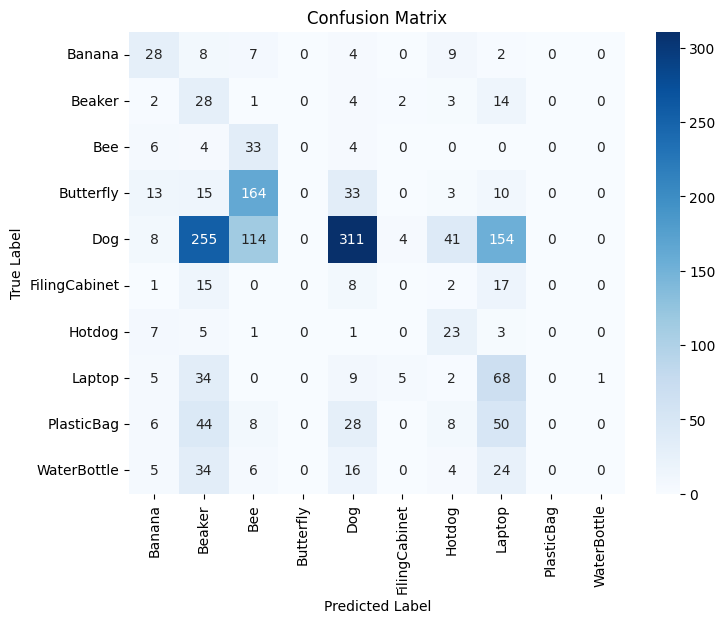

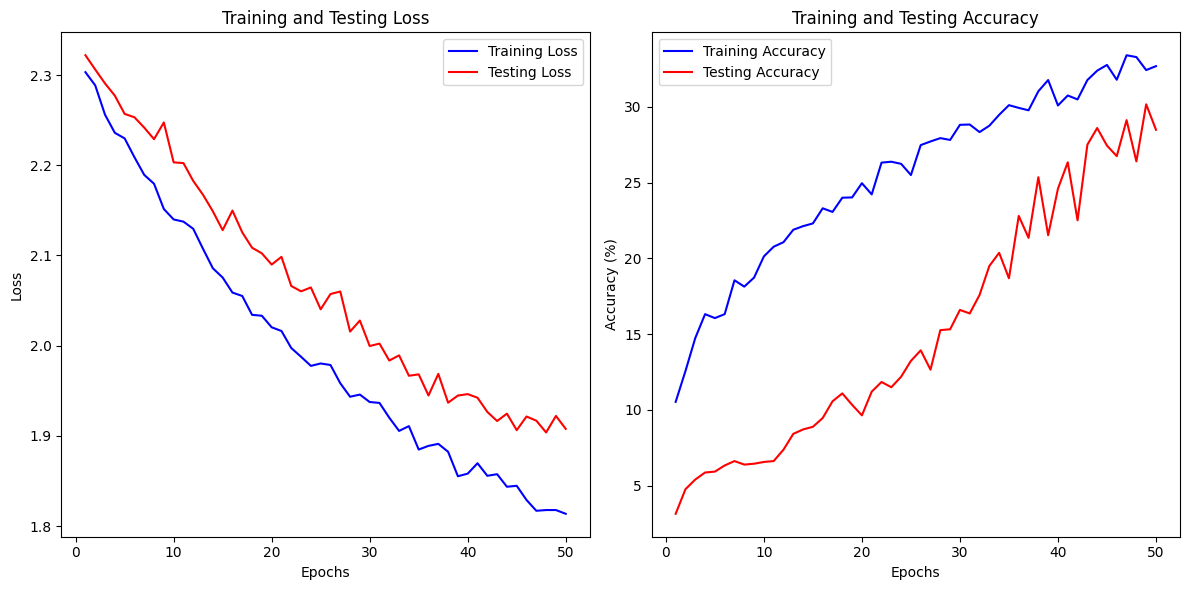

In [6]:
model = models.CNNReg(NUM_CLASSES).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=0.001)  # Adding regularization

# ==== TRAINING SCHLEIFE ====
print("Starting Training...")
train_losses, train_accuracies = [], []
test_losses, test_accuracies = [], []
for epoch in range(NUM_EPOCHS):
    print(f"Epoch {epoch+1}/{NUM_EPOCHS}")
    
    # Train & test
    train_loss, train_acc = helpers.train(model, train_loader, criterion, optimizer, DEVICE)
    test_loss, test_acc, all_preds, all_labels = helpers.test(model, test_loader, criterion, DEVICE)

    # Ergebnisse speichern
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)
    
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%")
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

print("Training Complete!")

# Darstellen der Ergebnisse
helpers.plot_confusion_matrix(all_labels, all_preds, classes=class_labels)
helpers.plot_training_history(train_losses, test_losses, train_accuracies, test_accuracies)
# Speichern des Modells für später
helpers.safe_model(model, "best_reg_cnn.pth")

Das sollte jetzt um einiges besser aussehen! Die rote und blauen Linien sollten sich nun einig sein und einen relativ hohen Wert (zwischen 30-40%) erreichen.

Manchmal ist es aber so, das vom Modell wichtige Sachen wieder vergessen werden. Euch ist sicher schon aufgefallen das die rote Linie nicht immer besser wird, sondern manchmal auch wieder schlechter. Das bedeuted, wenn wir zufällig in so einem schlechterem Fall aufhöhren zu trainieren, hat das Modell wichtige Dinge vergessen und kann sich daran nicht erinnern.

**Frage: Wie würdet ihr dieses Problem lösen?**

...

...

...

...

...

...

...

...

...

...

Wir können bei jedem Test in der Trainingsschleife das beste Modell speichern, und dieses am Ende, vor der letzten Testung, laden. Hierfür müssen wir immer wenn ein besseres Modell trainiert wurde, dieses abspeichern und den neuen besten Wert mit dem vorhergehenden überschreiben. Hierfür erstellen wir uns mal eine Variablen um diesen Wert zu speichern:

```
best_loss = 1000  # 1000 um immer einen höheren Wert zu haben
```

Danach überprüfen wir nach jedem Training und Testen ob das aktuelle Modell besser war als das vorher beste:

```
if test_loss < best_loss:
```

Wenn das so ist, speicher wir den neuen besten Wert und das Modell:

```
best_loss = test_loss  # Wenn es das ist, speicher wir den neuen, besten Score
helpers.safe_model(model, "best_best_reg_cnn.pth")
```

Dann können wir nach dem Trainieren das beste Modell laden und für weitere Arbeit verwenden (z.B.: um unsere live Kamerabilder zu klassifizieren):

```
print("Evaluation with best model")
model = helpers.load_model("best_best_reg_cnn.pth", models.CNNReg, NUM_CLASSES, DEVICE)
test_loss, test_acc, all_preds, all_labels = helpers.test(model, test_loader, criterion, DEVICE)
```

Starting Training...
Epoch 1/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.96batch/s]


Train Loss: 2.2950, Train Accuracy: 10.54%
Test Loss: 2.3010, Test Accuracy: 2.32%
Epoch 2/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.67batch/s]


Train Loss: 2.2925, Train Accuracy: 10.94%
Test Loss: 2.3004, Test Accuracy: 2.32%
Epoch 3/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.26batch/s]


Train Loss: 2.2807, Train Accuracy: 11.86%
Test Loss: 2.2951, Test Accuracy: 4.35%
Epoch 4/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.04batch/s]


Train Loss: 2.2544, Train Accuracy: 14.53%
Test Loss: 2.2756, Test Accuracy: 10.38%
Epoch 5/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.65batch/s]


Train Loss: 2.2205, Train Accuracy: 15.51%
Test Loss: 2.2171, Test Accuracy: 8.29%
Epoch 6/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.27batch/s]


Train Loss: 2.1976, Train Accuracy: 16.77%
Test Loss: 2.2080, Test Accuracy: 10.96%
Epoch 7/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.12batch/s]


Train Loss: 2.1941, Train Accuracy: 17.49%
Test Loss: 2.1943, Test Accuracy: 10.85%
Epoch 8/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.11batch/s]


Train Loss: 2.1790, Train Accuracy: 16.85%
Test Loss: 2.1999, Test Accuracy: 9.51%
Epoch 9/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.11batch/s]


Train Loss: 2.1644, Train Accuracy: 16.97%
Test Loss: 2.2051, Test Accuracy: 8.99%
Epoch 10/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.91batch/s]


Train Loss: 2.1527, Train Accuracy: 19.15%
Test Loss: 2.1840, Test Accuracy: 11.02%
Epoch 11/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.84batch/s]


Train Loss: 2.1346, Train Accuracy: 18.53%
Test Loss: 2.1863, Test Accuracy: 10.67%
Epoch 12/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.01batch/s]


Train Loss: 2.1174, Train Accuracy: 20.50%
Test Loss: 2.1604, Test Accuracy: 10.90%
Epoch 13/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.26batch/s]


Train Loss: 2.1250, Train Accuracy: 20.78%
Test Loss: 2.1437, Test Accuracy: 16.24%
Epoch 14/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.26batch/s]


Train Loss: 2.1050, Train Accuracy: 20.78%
Test Loss: 2.1386, Test Accuracy: 14.68%
Epoch 15/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.02batch/s]


Train Loss: 2.0970, Train Accuracy: 21.08%
Test Loss: 2.1391, Test Accuracy: 11.89%
Epoch 16/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.17batch/s]


Train Loss: 2.0960, Train Accuracy: 22.26%
Test Loss: 2.1361, Test Accuracy: 16.42%
Epoch 17/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.97batch/s]


Train Loss: 2.0766, Train Accuracy: 22.20%
Test Loss: 2.1163, Test Accuracy: 22.10%
Epoch 18/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.65batch/s]


Train Loss: 2.0760, Train Accuracy: 22.32%
Test Loss: 2.1438, Test Accuracy: 18.39%
Epoch 19/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.24batch/s]


Train Loss: 2.0522, Train Accuracy: 23.58%
Test Loss: 2.1114, Test Accuracy: 16.24%
Epoch 20/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.11batch/s]


Train Loss: 2.0513, Train Accuracy: 23.66%
Test Loss: 2.1235, Test Accuracy: 18.21%
Epoch 21/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.21batch/s]


Train Loss: 2.0536, Train Accuracy: 23.08%
Test Loss: 2.1175, Test Accuracy: 19.49%
Epoch 22/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.21batch/s]


Train Loss: 2.0375, Train Accuracy: 23.78%
Test Loss: 2.0870, Test Accuracy: 18.74%
Epoch 23/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.09batch/s]


Train Loss: 2.0178, Train Accuracy: 25.21%
Test Loss: 2.0557, Test Accuracy: 20.71%
Epoch 24/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.71batch/s]


Train Loss: 2.0128, Train Accuracy: 24.96%
Test Loss: 2.0873, Test Accuracy: 22.85%
Epoch 25/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.01batch/s]


Train Loss: 2.0087, Train Accuracy: 24.88%
Test Loss: 2.1067, Test Accuracy: 18.33%
Epoch 26/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.21batch/s]


Train Loss: 1.9830, Train Accuracy: 26.49%
Test Loss: 2.0685, Test Accuracy: 18.56%
Epoch 27/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.22batch/s]


Train Loss: 1.9862, Train Accuracy: 25.01%
Test Loss: 2.0622, Test Accuracy: 23.78%
Epoch 28/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.24batch/s]


Train Loss: 1.9829, Train Accuracy: 26.37%
Test Loss: 2.0395, Test Accuracy: 26.80%
Epoch 29/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.27batch/s]


Train Loss: 1.9661, Train Accuracy: 26.15%
Test Loss: 2.0294, Test Accuracy: 21.75%
Epoch 30/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.96batch/s]


Train Loss: 1.9721, Train Accuracy: 26.77%
Test Loss: 2.0531, Test Accuracy: 26.80%
Epoch 31/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.76batch/s]


Train Loss: 1.9617, Train Accuracy: 27.81%
Test Loss: 2.0317, Test Accuracy: 24.88%
Epoch 32/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.19batch/s]


Train Loss: 1.9434, Train Accuracy: 28.77%
Test Loss: 2.0231, Test Accuracy: 26.80%
Epoch 33/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.16batch/s]


Train Loss: 1.9374, Train Accuracy: 28.11%
Test Loss: 1.9996, Test Accuracy: 24.71%
Epoch 34/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.17batch/s]


Train Loss: 1.9328, Train Accuracy: 28.21%
Test Loss: 2.0043, Test Accuracy: 24.48%
Epoch 35/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.01batch/s]


Train Loss: 1.9278, Train Accuracy: 28.59%
Test Loss: 2.0464, Test Accuracy: 24.13%
Epoch 36/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.14batch/s]


Train Loss: 1.9170, Train Accuracy: 28.93%
Test Loss: 1.9635, Test Accuracy: 27.49%
Epoch 37/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.67batch/s]


Train Loss: 1.9137, Train Accuracy: 28.41%
Test Loss: 2.0252, Test Accuracy: 23.67%
Epoch 38/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.07batch/s]


Train Loss: 1.9045, Train Accuracy: 29.71%
Test Loss: 2.0214, Test Accuracy: 22.85%
Epoch 39/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.22batch/s]


Train Loss: 1.8994, Train Accuracy: 29.73%
Test Loss: 1.9379, Test Accuracy: 29.23%
Epoch 40/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.12batch/s]


Train Loss: 1.8898, Train Accuracy: 30.55%
Test Loss: 1.9533, Test Accuracy: 28.19%
Epoch 41/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.04batch/s]


Train Loss: 1.8932, Train Accuracy: 29.97%
Test Loss: 1.9170, Test Accuracy: 30.68%
Epoch 42/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.17batch/s]


Train Loss: 1.8942, Train Accuracy: 29.57%
Test Loss: 1.9465, Test Accuracy: 29.76%
Epoch 43/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.83batch/s]


Train Loss: 1.8772, Train Accuracy: 30.27%
Test Loss: 1.9041, Test Accuracy: 32.89%
Epoch 44/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.68batch/s]


Train Loss: 1.8746, Train Accuracy: 31.02%
Test Loss: 1.9729, Test Accuracy: 24.54%
Epoch 45/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.04batch/s]


Train Loss: 1.8704, Train Accuracy: 30.37%
Test Loss: 1.8650, Test Accuracy: 35.44%
Epoch 46/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.21batch/s]


Train Loss: 1.8589, Train Accuracy: 30.41%
Test Loss: 1.9340, Test Accuracy: 30.57%
Epoch 47/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.01batch/s]


Train Loss: 1.8763, Train Accuracy: 30.33%
Test Loss: 1.9688, Test Accuracy: 26.62%
Epoch 48/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.94batch/s]


Train Loss: 1.8449, Train Accuracy: 31.70%
Test Loss: 1.9259, Test Accuracy: 30.92%
Epoch 49/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 36.12batch/s]


Train Loss: 1.8463, Train Accuracy: 31.44%
Test Loss: 1.9150, Test Accuracy: 31.67%
Epoch 50/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 35.54batch/s]


Train Loss: 1.8209, Train Accuracy: 32.74%
Test Loss: 1.9043, Test Accuracy: 30.22%
Training Complete!
Evaluation with best model


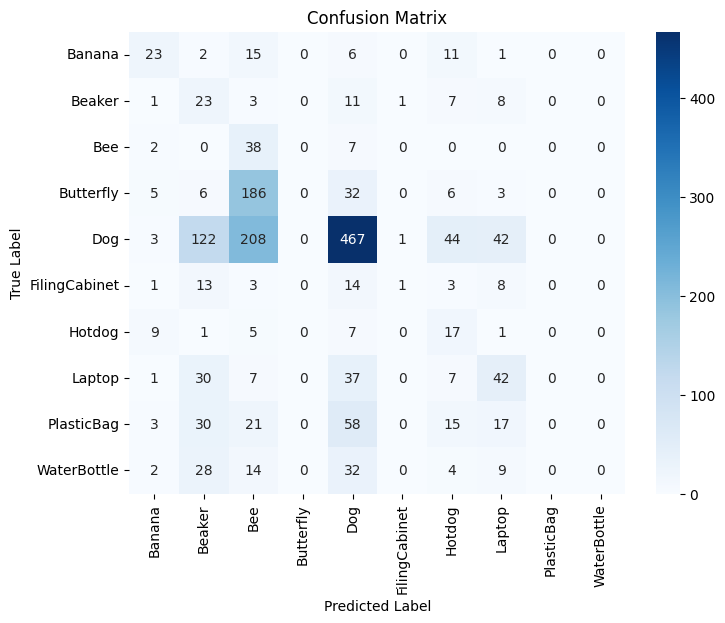

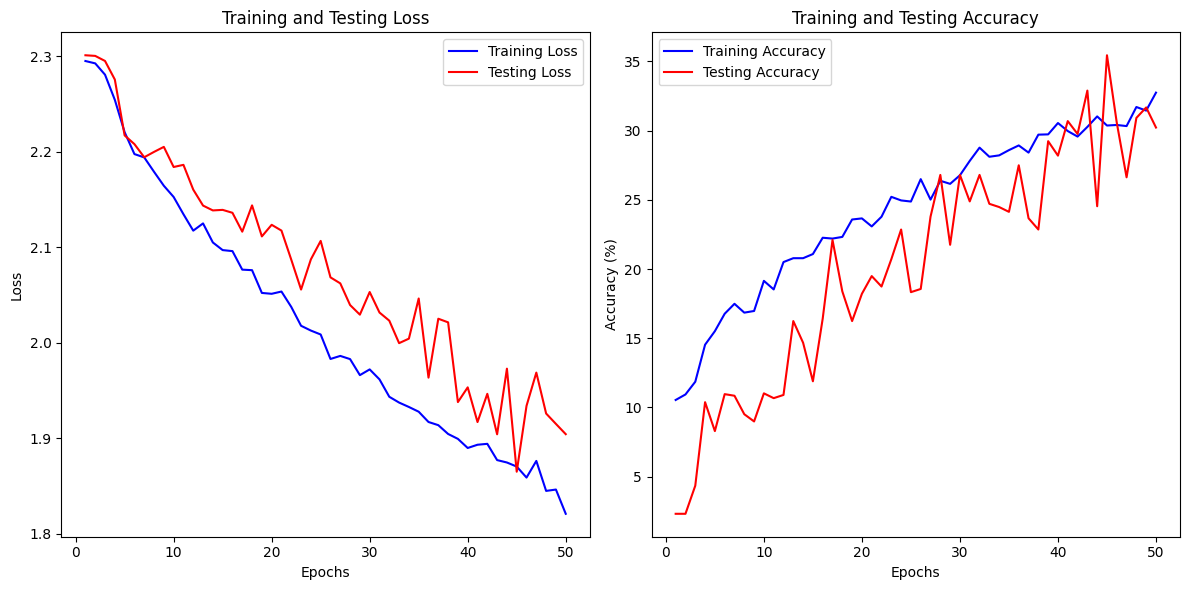

In [7]:
best_loss = 1000  # 1000 damit der Startwert immer der höchste ist

model = models.CNNReg(NUM_CLASSES).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=0.001)

# ==== TRAINING SCHLEIFE ====
print("Starting Training...")
train_losses, train_accuracies = [], []
test_losses, test_accuracies = [], []
for epoch in range(NUM_EPOCHS):
    print(f"Epoch {epoch+1}/{NUM_EPOCHS}")
    
    # Train & test
    train_loss, train_acc = helpers.train(model, train_loader, criterion, optimizer, DEVICE)
    test_loss, test_acc, all_preds, all_labels = helpers.test(model, test_loader, criterion, DEVICE)

    # Ergebnisse speichern
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%")
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

    # Hier merken wir uns ob das aktuelle Modell, das beste ist
    if test_loss < best_loss:
        best_loss = test_loss  # Wenn es das ist, speicher wir den neuen, besten Score 
        helpers.safe_model(model, "best_best_reg_cnn.pth") # Und das Modell für später

print("Training Complete!")

print("Evaluation with best model")
model = helpers.load_model("best_best_reg_cnn.pth", models.CNNReg, NUM_CLASSES, DEVICE)
test_loss, test_acc, all_preds, all_labels = helpers.test(model, test_loader, criterion, DEVICE)  # und verwenden es um ungesehene Daten zu klassifizieren

# Darstellen der Ergebnisse
helpers.plot_confusion_matrix(all_labels, all_preds, classes=class_labels)
helpers.plot_training_history(train_losses, test_losses, train_accuracies, test_accuracies)

Hier wird noch eine so genannte Batch Norm hinzugefügt. 

**Frage: Was zeigen die Ergebnisse? Sind diese besser oder schlechter?**

Starting Training...
Epoch 1/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.48batch/s]


Train Loss: 2.5663, Train Accuracy: 10.68%
Test Loss: 2.3030, Test Accuracy: 6.96%
Epoch 2/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.62batch/s]


Train Loss: 2.4594, Train Accuracy: 12.54%
Test Loss: 2.2652, Test Accuracy: 10.32%
Epoch 3/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.58batch/s]


Train Loss: 2.3875, Train Accuracy: 14.61%
Test Loss: 2.2505, Test Accuracy: 14.15%
Epoch 4/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.66batch/s]


Train Loss: 2.3448, Train Accuracy: 15.97%
Test Loss: 2.2180, Test Accuracy: 15.55%
Epoch 5/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.35batch/s]


Train Loss: 2.3157, Train Accuracy: 16.37%
Test Loss: 2.1935, Test Accuracy: 18.27%
Epoch 6/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.57batch/s]


Train Loss: 2.2524, Train Accuracy: 16.85%
Test Loss: 2.1568, Test Accuracy: 21.75%
Epoch 7/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.63batch/s]


Train Loss: 2.2108, Train Accuracy: 18.61%
Test Loss: 2.1437, Test Accuracy: 24.01%
Epoch 8/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.55batch/s]


Train Loss: 2.1996, Train Accuracy: 19.39%
Test Loss: 2.1093, Test Accuracy: 30.39%
Epoch 9/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.60batch/s]


Train Loss: 2.1648, Train Accuracy: 19.68%
Test Loss: 2.0842, Test Accuracy: 32.89%
Epoch 10/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.51batch/s]


Train Loss: 2.1394, Train Accuracy: 21.36%
Test Loss: 2.0657, Test Accuracy: 33.64%
Epoch 11/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.27batch/s]


Train Loss: 2.1206, Train Accuracy: 22.58%
Test Loss: 2.0701, Test Accuracy: 33.70%
Epoch 12/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.56batch/s]


Train Loss: 2.0879, Train Accuracy: 23.60%
Test Loss: 2.0400, Test Accuracy: 37.35%
Epoch 13/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.51batch/s]


Train Loss: 2.0670, Train Accuracy: 25.00%
Test Loss: 2.0616, Test Accuracy: 34.16%
Epoch 14/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.60batch/s]


Train Loss: 2.0513, Train Accuracy: 25.61%
Test Loss: 2.0047, Test Accuracy: 41.36%
Epoch 15/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.63batch/s]


Train Loss: 2.0372, Train Accuracy: 26.73%
Test Loss: 1.9975, Test Accuracy: 40.72%
Epoch 16/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.19batch/s]


Train Loss: 2.0150, Train Accuracy: 26.81%
Test Loss: 1.9526, Test Accuracy: 41.65%
Epoch 17/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.53batch/s]


Train Loss: 1.9902, Train Accuracy: 27.87%
Test Loss: 2.0232, Test Accuracy: 39.10%
Epoch 18/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.60batch/s]


Train Loss: 1.9687, Train Accuracy: 28.31%
Test Loss: 1.9029, Test Accuracy: 49.19%
Epoch 19/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.61batch/s]


Train Loss: 1.9501, Train Accuracy: 29.29%
Test Loss: 1.9257, Test Accuracy: 47.68%
Epoch 20/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.57batch/s]


Train Loss: 1.9440, Train Accuracy: 29.99%
Test Loss: 1.9585, Test Accuracy: 43.74%
Epoch 21/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.57batch/s]


Train Loss: 1.9134, Train Accuracy: 30.70%
Test Loss: 1.9115, Test Accuracy: 47.97%
Epoch 22/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.37batch/s]


Train Loss: 1.9262, Train Accuracy: 30.09%
Test Loss: 1.9531, Test Accuracy: 44.43%
Epoch 23/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.60batch/s]


Train Loss: 1.9030, Train Accuracy: 31.48%
Test Loss: 1.8101, Test Accuracy: 52.61%
Epoch 24/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.57batch/s]


Train Loss: 1.8844, Train Accuracy: 32.88%
Test Loss: 1.8417, Test Accuracy: 47.74%
Epoch 25/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.61batch/s]


Train Loss: 1.8619, Train Accuracy: 32.58%
Test Loss: 1.7941, Test Accuracy: 52.61%
Epoch 26/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.64batch/s]


Train Loss: 1.8560, Train Accuracy: 33.64%
Test Loss: 1.8622, Test Accuracy: 48.90%
Epoch 27/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.24batch/s]


Train Loss: 1.8405, Train Accuracy: 33.78%
Test Loss: 1.8289, Test Accuracy: 50.23%
Epoch 28/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.08batch/s]


Train Loss: 1.8091, Train Accuracy: 35.20%
Test Loss: 1.7954, Test Accuracy: 48.38%
Epoch 29/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.31batch/s]


Train Loss: 1.8070, Train Accuracy: 35.76%
Test Loss: 1.7573, Test Accuracy: 50.29%
Epoch 30/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.59batch/s]


Train Loss: 1.7885, Train Accuracy: 36.33%
Test Loss: 1.7951, Test Accuracy: 50.41%
Epoch 31/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.66batch/s]


Train Loss: 1.7907, Train Accuracy: 35.62%
Test Loss: 1.8168, Test Accuracy: 46.81%
Epoch 32/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.24batch/s]


Train Loss: 1.7662, Train Accuracy: 36.67%
Test Loss: 1.7857, Test Accuracy: 48.61%
Epoch 33/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 29.95batch/s]


Train Loss: 1.7473, Train Accuracy: 37.83%
Test Loss: 1.7082, Test Accuracy: 52.20%
Epoch 34/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.20batch/s]


Train Loss: 1.7140, Train Accuracy: 38.39%
Test Loss: 1.7945, Test Accuracy: 50.23%
Epoch 35/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.63batch/s]


Train Loss: 1.7133, Train Accuracy: 39.45%
Test Loss: 1.8377, Test Accuracy: 45.48%
Epoch 36/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.62batch/s]


Train Loss: 1.7030, Train Accuracy: 39.31%
Test Loss: 1.7737, Test Accuracy: 48.20%
Epoch 37/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.61batch/s]


Train Loss: 1.6757, Train Accuracy: 40.85%
Test Loss: 1.6146, Test Accuracy: 55.22%
Epoch 38/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.27batch/s]


Train Loss: 1.6711, Train Accuracy: 41.51%
Test Loss: 1.8867, Test Accuracy: 40.84%
Epoch 39/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.53batch/s]


Train Loss: 1.6467, Train Accuracy: 40.87%
Test Loss: 1.8569, Test Accuracy: 42.00%
Epoch 40/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.55batch/s]


Train Loss: 1.6403, Train Accuracy: 41.25%
Test Loss: 1.7457, Test Accuracy: 46.75%
Epoch 41/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.60batch/s]


Train Loss: 1.6134, Train Accuracy: 42.96%
Test Loss: 1.8147, Test Accuracy: 44.43%
Epoch 42/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.54batch/s]


Train Loss: 1.6121, Train Accuracy: 40.75%
Test Loss: 1.6716, Test Accuracy: 50.12%
Epoch 43/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.21batch/s]


Train Loss: 1.5904, Train Accuracy: 42.56%
Test Loss: 1.6985, Test Accuracy: 48.55%
Epoch 44/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.34batch/s]


Train Loss: 1.5813, Train Accuracy: 43.06%
Test Loss: 1.7017, Test Accuracy: 47.04%
Epoch 45/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.58batch/s]


Train Loss: 1.5742, Train Accuracy: 42.94%
Test Loss: 1.7823, Test Accuracy: 43.04%
Epoch 46/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.54batch/s]


Train Loss: 1.5486, Train Accuracy: 44.50%
Test Loss: 1.6864, Test Accuracy: 48.67%
Epoch 47/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.61batch/s]


Train Loss: 1.5468, Train Accuracy: 43.96%
Test Loss: 1.8204, Test Accuracy: 39.56%
Epoch 48/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.60batch/s]


Train Loss: 1.5145, Train Accuracy: 44.78%
Test Loss: 1.6795, Test Accuracy: 49.88%
Epoch 49/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.27batch/s]


Train Loss: 1.5155, Train Accuracy: 45.42%
Test Loss: 1.7950, Test Accuracy: 40.08%
Epoch 50/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.54batch/s]


Train Loss: 1.5035, Train Accuracy: 46.32%
Test Loss: 1.6327, Test Accuracy: 50.70%
Training Complete!
Evaluation with best model


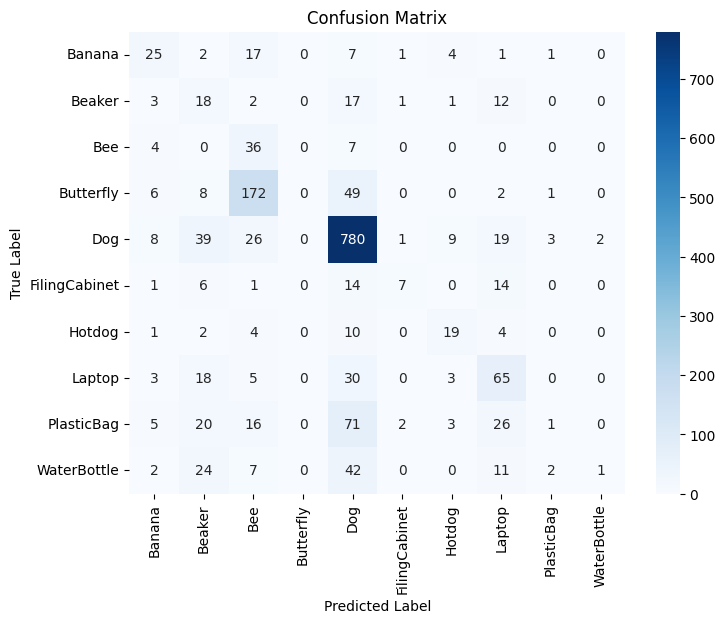

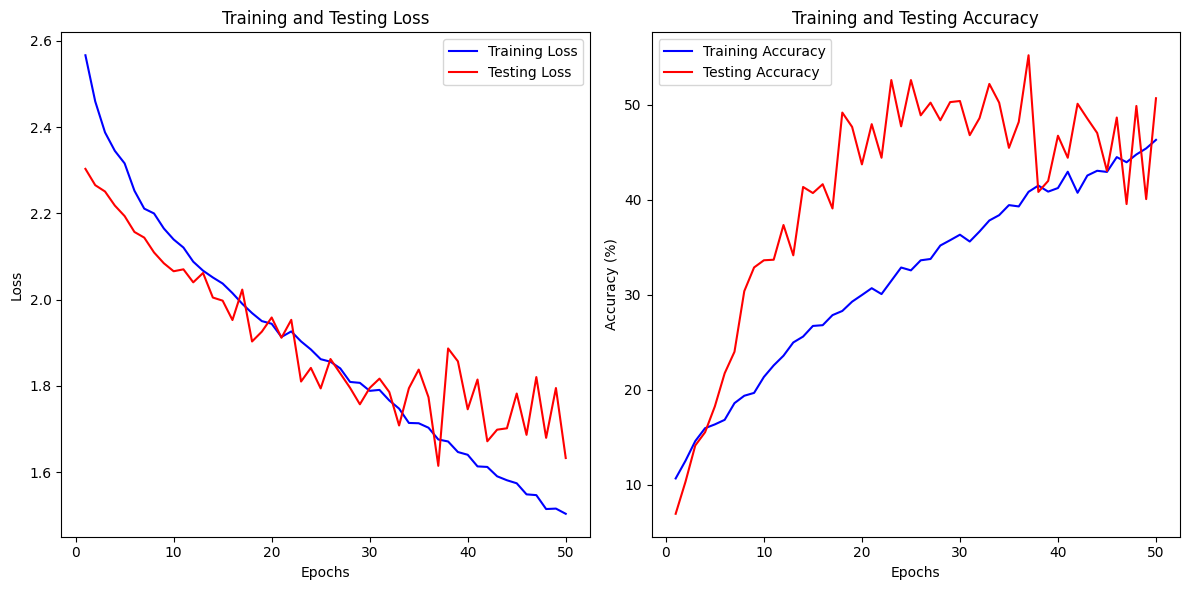

In [8]:
# Hinzugefügt: Batch Norm
best_loss = 1000 
best_model_states = {}

model = models.CNNRegBN(NUM_CLASSES).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=0.0025)  # Adding regularization

# ==== TRAINING SCHLEIFE ====
print("Starting Training...")
train_losses, train_accuracies = [], []
test_losses, test_accuracies = [], []
for epoch in range(NUM_EPOCHS):
    print(f"Epoch {epoch+1}/{NUM_EPOCHS}")
    
    # Train & test
    train_loss, train_acc = helpers.train(model, train_loader, criterion, optimizer, DEVICE)
    test_loss, test_acc, all_preds, all_labels = helpers.test(model, test_loader, criterion, DEVICE)

    # Ergebnisse speichern
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%")
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

    # Speichern des besten Modells
    if test_loss < best_loss:
        best_loss = test_loss
        helpers.safe_model(model, "best_best_reg_bn_cnn.pth")

print("Training Complete!")

print("Evaluation with best model")
model = helpers.load_model("best_best_reg_bn_cnn.pth", models.CNNRegBN, NUM_CLASSES, DEVICE)
test_loss, test_acc, all_preds, all_labels = helpers.test(model, test_loader, criterion, DEVICE)

# Darstellen der Ergebnisse
helpers.plot_confusion_matrix(all_labels, all_preds, classes=class_labels)
helpers.plot_training_history(train_losses, test_losses, train_accuracies, test_accuracies)

Hier wird so genanntes Label Smoothing und AdamW verwendet.

**Frage: Was zeigen die Ergebnisse? Sind diese besser oder schlechter?**

Starting Training...
Epoch 1/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.32batch/s]


Train Loss: 2.5890, Train Accuracy: 10.80%
Test Loss: 2.2174, Test Accuracy: 17.98%
Epoch 2/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.58batch/s]


Train Loss: 2.4485, Train Accuracy: 12.76%
Test Loss: 2.1831, Test Accuracy: 23.26%
Epoch 3/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.57batch/s]


Train Loss: 2.3906, Train Accuracy: 13.89%
Test Loss: 2.1593, Test Accuracy: 22.39%
Epoch 4/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.22batch/s]


Train Loss: 2.3325, Train Accuracy: 15.07%
Test Loss: 2.1393, Test Accuracy: 29.12%
Epoch 5/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.49batch/s]


Train Loss: 2.2882, Train Accuracy: 17.69%
Test Loss: 2.0843, Test Accuracy: 34.57%
Epoch 6/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.54batch/s]


Train Loss: 2.2802, Train Accuracy: 17.01%
Test Loss: 2.0836, Test Accuracy: 38.81%
Epoch 7/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.55batch/s]


Train Loss: 2.2397, Train Accuracy: 18.55%
Test Loss: 2.0758, Test Accuracy: 40.72%
Epoch 8/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.57batch/s]


Train Loss: 2.2218, Train Accuracy: 19.39%
Test Loss: 2.0927, Test Accuracy: 36.02%
Epoch 9/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.43batch/s]


Train Loss: 2.1903, Train Accuracy: 20.72%
Test Loss: 2.0108, Test Accuracy: 47.91%
Epoch 10/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.26batch/s]


Train Loss: 2.1773, Train Accuracy: 21.90%
Test Loss: 2.0421, Test Accuracy: 45.36%
Epoch 11/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.55batch/s]


Train Loss: 2.1605, Train Accuracy: 22.02%
Test Loss: 2.0406, Test Accuracy: 45.82%
Epoch 12/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.57batch/s]


Train Loss: 2.1411, Train Accuracy: 23.26%
Test Loss: 2.0236, Test Accuracy: 45.19%
Epoch 13/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.44batch/s]


Train Loss: 2.1222, Train Accuracy: 23.68%
Test Loss: 2.0142, Test Accuracy: 46.06%
Epoch 14/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 28.98batch/s]


Train Loss: 2.1069, Train Accuracy: 24.94%
Test Loss: 1.9709, Test Accuracy: 48.49%
Epoch 15/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 27.27batch/s]


Train Loss: 2.0896, Train Accuracy: 26.63%
Test Loss: 1.9880, Test Accuracy: 46.23%
Epoch 16/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 29.13batch/s]


Train Loss: 2.0719, Train Accuracy: 26.95%
Test Loss: 1.9794, Test Accuracy: 46.98%
Epoch 17/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 28.47batch/s]


Train Loss: 2.0451, Train Accuracy: 28.69%
Test Loss: 1.9365, Test Accuracy: 50.46%
Epoch 18/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 29.00batch/s]


Train Loss: 2.0374, Train Accuracy: 28.93%
Test Loss: 1.9570, Test Accuracy: 49.01%
Epoch 19/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 29.64batch/s]


Train Loss: 2.0326, Train Accuracy: 29.87%
Test Loss: 1.9236, Test Accuracy: 51.04%
Epoch 20/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 28.34batch/s]


Train Loss: 2.0103, Train Accuracy: 30.31%
Test Loss: 1.8768, Test Accuracy: 54.41%
Epoch 21/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 28.57batch/s]


Train Loss: 1.9995, Train Accuracy: 32.10%
Test Loss: 1.9095, Test Accuracy: 49.30%
Epoch 22/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 29.75batch/s]


Train Loss: 1.9920, Train Accuracy: 31.92%
Test Loss: 1.9730, Test Accuracy: 42.81%
Epoch 23/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 29.10batch/s]


Train Loss: 1.9758, Train Accuracy: 32.36%
Test Loss: 1.9490, Test Accuracy: 46.00%
Epoch 24/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 29.28batch/s]


Train Loss: 1.9494, Train Accuracy: 34.10%
Test Loss: 1.8802, Test Accuracy: 49.71%
Epoch 25/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.05batch/s]


Train Loss: 1.9455, Train Accuracy: 34.02%
Test Loss: 1.8549, Test Accuracy: 49.77%
Epoch 26/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 29.54batch/s]


Train Loss: 1.9228, Train Accuracy: 34.72%
Test Loss: 1.9193, Test Accuracy: 47.85%
Epoch 27/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 29.68batch/s]


Train Loss: 1.9163, Train Accuracy: 35.58%
Test Loss: 1.8010, Test Accuracy: 53.48%
Epoch 28/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 27.92batch/s]


Train Loss: 1.9144, Train Accuracy: 34.92%
Test Loss: 1.8701, Test Accuracy: 48.90%
Epoch 29/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 29.41batch/s]


Train Loss: 1.9041, Train Accuracy: 35.12%
Test Loss: 1.8649, Test Accuracy: 49.88%
Epoch 30/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 28.32batch/s]


Train Loss: 1.8909, Train Accuracy: 36.45%
Test Loss: 1.8068, Test Accuracy: 53.94%
Epoch 31/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 27.76batch/s]


Train Loss: 1.8898, Train Accuracy: 36.73%
Test Loss: 1.8308, Test Accuracy: 52.26%
Epoch 32/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 28.35batch/s]


Train Loss: 1.8686, Train Accuracy: 38.19%
Test Loss: 1.8575, Test Accuracy: 50.87%
Epoch 33/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 29.09batch/s]


Train Loss: 1.8467, Train Accuracy: 39.03%
Test Loss: 1.7997, Test Accuracy: 51.74%
Epoch 34/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:03<00:00, 25.73batch/s]


Train Loss: 1.8439, Train Accuracy: 38.97%
Test Loss: 1.8046, Test Accuracy: 51.39%
Epoch 35/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 28.92batch/s]


Train Loss: 1.8331, Train Accuracy: 39.71%
Test Loss: 1.9153, Test Accuracy: 42.58%
Epoch 36/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.15batch/s]


Train Loss: 1.8305, Train Accuracy: 39.67%
Test Loss: 1.8747, Test Accuracy: 47.45%
Epoch 37/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.62batch/s]


Train Loss: 1.8172, Train Accuracy: 40.45%
Test Loss: 1.6969, Test Accuracy: 54.76%
Epoch 38/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 29.31batch/s]


Train Loss: 1.7982, Train Accuracy: 40.27%
Test Loss: 1.7729, Test Accuracy: 51.57%
Epoch 39/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.05batch/s]


Train Loss: 1.7984, Train Accuracy: 40.65%
Test Loss: 1.6695, Test Accuracy: 53.19%
Epoch 40/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 29.32batch/s]


Train Loss: 1.7952, Train Accuracy: 40.77%
Test Loss: 1.8194, Test Accuracy: 48.55%
Epoch 41/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 29.54batch/s]


Train Loss: 1.7686, Train Accuracy: 42.82%
Test Loss: 1.8618, Test Accuracy: 45.42%
Epoch 42/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 29.81batch/s]


Train Loss: 1.7691, Train Accuracy: 42.40%
Test Loss: 1.7856, Test Accuracy: 49.36%
Epoch 43/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 29.24batch/s]


Train Loss: 1.7692, Train Accuracy: 42.10%
Test Loss: 1.7774, Test Accuracy: 51.68%
Epoch 44/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 29.63batch/s]


Train Loss: 1.7474, Train Accuracy: 42.68%
Test Loss: 1.8533, Test Accuracy: 45.71%
Epoch 45/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 29.72batch/s]


Train Loss: 1.7335, Train Accuracy: 44.90%
Test Loss: 1.7561, Test Accuracy: 52.38%
Epoch 46/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 29.89batch/s]


Train Loss: 1.7334, Train Accuracy: 43.72%
Test Loss: 1.7306, Test Accuracy: 53.71%
Epoch 47/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.45batch/s]


Train Loss: 1.7188, Train Accuracy: 45.20%
Test Loss: 1.8327, Test Accuracy: 45.42%
Epoch 48/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.68batch/s]


Train Loss: 1.7196, Train Accuracy: 44.40%
Test Loss: 1.7455, Test Accuracy: 50.99%
Epoch 49/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.56batch/s]


Train Loss: 1.7069, Train Accuracy: 45.28%
Test Loss: 1.7605, Test Accuracy: 48.84%
Epoch 50/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 29.84batch/s]


Train Loss: 1.6864, Train Accuracy: 46.94%
Test Loss: 1.7916, Test Accuracy: 48.38%
Training Complete!
Evaluation with best model


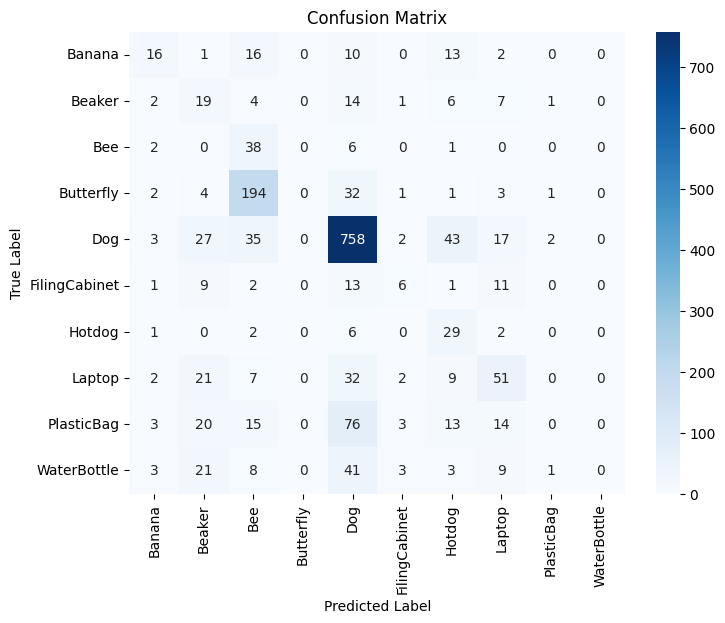

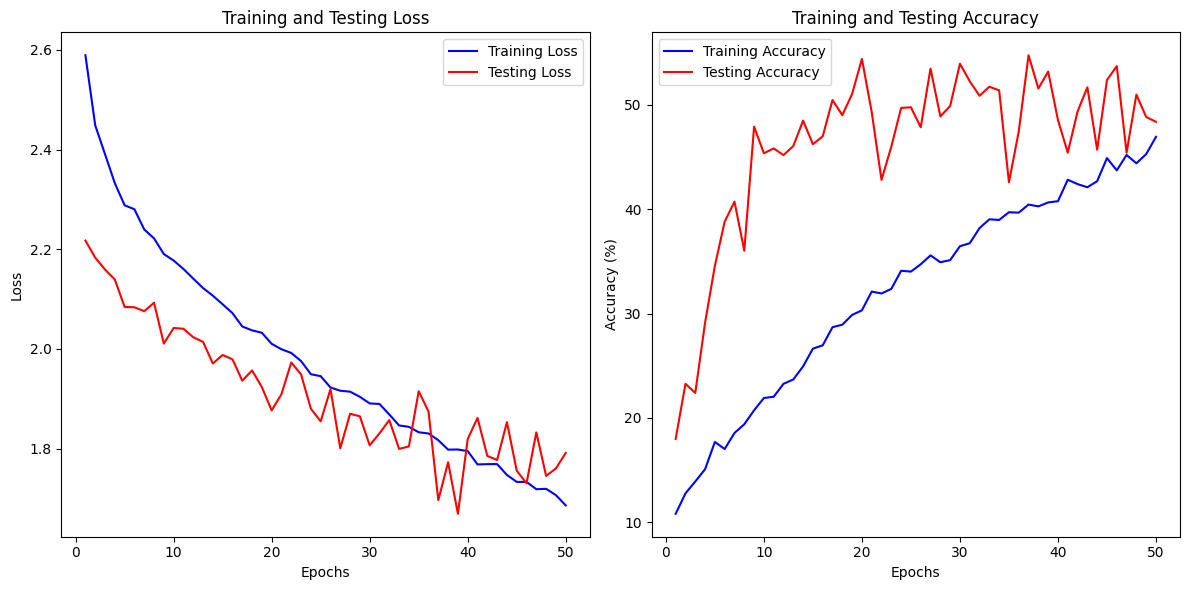

In [9]:
# Hinzugefügt: Label Smoothing und AdamW
best_loss = 1000
best_model_states = {}


model = models.CNNRegBN(NUM_CLASSES).to(DEVICE)
criterion = helpers.LabelSmoothingCrossEntropy()
optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=0.0025)

# ==== TRAINING SCHLEIFE ====
print("Starting Training...")
train_losses, train_accuracies = [], []
test_losses, test_accuracies = [], []
for epoch in range(NUM_EPOCHS):
    print(f"Epoch {epoch+1}/{NUM_EPOCHS}")
    
    # Train & test
    train_loss, train_acc = helpers.train(model, train_loader, criterion, optimizer, DEVICE)
    test_loss, test_acc, all_preds, all_labels = helpers.test(model, test_loader, criterion, DEVICE)

    # Ergebnisse speichern
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%")
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

        # Speichern des besten Modells
    if test_loss < best_loss:
        best_loss = test_loss
        helpers.safe_model(model, "best_overall_cnn.pth")

print("Training Complete!")

print("Evaluation with best model")
model = helpers.load_model("best_overall_cnn.pth", models.CNNRegBN, NUM_CLASSES, DEVICE)
test_loss, test_acc, all_preds, all_labels = helpers.test(model, test_loader, criterion, DEVICE)

helpers.plot_confusion_matrix(all_labels, all_preds, classes=class_labels)
helpers.plot_training_history(train_losses, test_losses, train_accuracies, test_accuracies)

In [10]:
train_loader_balanced = helpers.get_balanced_trainloader(DATA_DIR, BATCH_SIZE, NUM_WORKERS)

Loading training data into RAM...
Class distribution before undersampling: Counter({np.int64(1): 650, np.int64(4): 609, np.int64(0): 560, np.int64(2): 557, np.int64(6): 533, np.int64(7): 523, np.int64(8): 467, np.int64(9): 467, np.int64(5): 436, np.int64(3): 207})
Using 207 samples per class for balance.
Class distribution after undersampling: Counter({np.int64(0): 207, np.int64(1): 207, np.int64(2): 207, np.int64(3): 207, np.int64(4): 207, np.int64(5): 207, np.int64(6): 207, np.int64(7): 207, np.int64(8): 207, np.int64(9): 207})
Undersampling applied! Training data is now balanced.


Wie man anhand der Kurven und der Verwirrungsmatrix sehen kann funktioniert die Erkennung bereits sehr gut funktioniert. Jedoch werden z.B. alle Schmetterlinge als Bienen erkannt, was sehr schlecht ist. Der Grund hierfür ist das Bienen häufiger in den Trainingsdaten vorkommen wie Schmetterlinge und meistens auf Blumen sitzen, was Bias in den Trainingsdaten erzeugt --> Sehr gefährlich.

**Frage: Was denkt ihr könnten wir tun um dieses Problem zu umgehen?**

...

...

...

...

...

...

...

...

...

...

Die einfachste Art dieses Problem zu umgehen ist es, die Objektklasse mit den wenigsten Bildern zu finden, und von allen anderen so viele Bilder wegzuschmeißen damit alle gleich viele Bilder haben. Hierfür könnt ihr den *train_loder_balanced* verwenden, welcher alle Daten ausgeglichen liefert:

```
train_loss, train_acc = helpers.train(model, train_loader_balanced, criterion, optimizer, DEVICE)
```

Starting Training...
Epoch 1/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 22.28batch/s]


Train Loss: 2.6012, Train Accuracy: 11.35%
Test Loss: 2.2155, Test Accuracy: 25.12%
Epoch 2/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.70batch/s]


Train Loss: 2.5401, Train Accuracy: 11.64%
Test Loss: 2.1479, Test Accuracy: 29.99%
Epoch 3/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.85batch/s]


Train Loss: 2.4598, Train Accuracy: 12.95%
Test Loss: 2.1377, Test Accuracy: 27.38%
Epoch 4/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 32.23batch/s]


Train Loss: 2.4336, Train Accuracy: 13.91%
Test Loss: 2.1466, Test Accuracy: 24.25%
Epoch 5/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.90batch/s]


Train Loss: 2.3756, Train Accuracy: 15.65%
Test Loss: 2.1177, Test Accuracy: 30.16%
Epoch 6/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.58batch/s]


Train Loss: 2.3754, Train Accuracy: 15.46%
Test Loss: 2.1238, Test Accuracy: 30.57%
Epoch 7/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 29.73batch/s]


Train Loss: 2.3653, Train Accuracy: 16.57%
Test Loss: 2.1204, Test Accuracy: 34.22%
Epoch 8/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.58batch/s]


Train Loss: 2.3088, Train Accuracy: 16.18%
Test Loss: 2.1015, Test Accuracy: 34.98%
Epoch 9/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.49batch/s]


Train Loss: 2.3074, Train Accuracy: 17.39%
Test Loss: 2.1177, Test Accuracy: 33.76%
Epoch 10/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.58batch/s]


Train Loss: 2.3156, Train Accuracy: 16.86%
Test Loss: 2.0831, Test Accuracy: 37.94%
Epoch 11/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.67batch/s]


Train Loss: 2.2962, Train Accuracy: 17.68%
Test Loss: 2.1023, Test Accuracy: 32.71%
Epoch 12/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.73batch/s]


Train Loss: 2.2961, Train Accuracy: 16.43%
Test Loss: 2.1006, Test Accuracy: 35.61%
Epoch 13/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.67batch/s]


Train Loss: 2.2499, Train Accuracy: 18.94%
Test Loss: 2.0855, Test Accuracy: 39.15%
Epoch 14/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.58batch/s]


Train Loss: 2.2454, Train Accuracy: 17.58%
Test Loss: 2.0970, Test Accuracy: 34.34%
Epoch 15/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.61batch/s]


Train Loss: 2.2461, Train Accuracy: 17.29%
Test Loss: 2.0878, Test Accuracy: 36.72%
Epoch 16/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 32.07batch/s]


Train Loss: 2.2366, Train Accuracy: 21.06%
Test Loss: 2.0898, Test Accuracy: 37.18%
Epoch 17/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 32.07batch/s]


Train Loss: 2.2236, Train Accuracy: 19.32%
Test Loss: 2.0839, Test Accuracy: 39.10%
Epoch 18/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 32.07batch/s]


Train Loss: 2.1984, Train Accuracy: 21.16%
Test Loss: 2.0861, Test Accuracy: 37.99%
Epoch 19/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 32.04batch/s]


Train Loss: 2.1893, Train Accuracy: 20.05%
Test Loss: 2.0980, Test Accuracy: 33.47%
Epoch 20/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 32.16batch/s]


Train Loss: 2.1784, Train Accuracy: 23.04%
Test Loss: 2.0820, Test Accuracy: 37.18%
Epoch 21/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.95batch/s]


Train Loss: 2.1694, Train Accuracy: 20.14%
Test Loss: 2.0934, Test Accuracy: 35.03%
Epoch 22/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 32.13batch/s]


Train Loss: 2.1536, Train Accuracy: 23.57%
Test Loss: 2.0677, Test Accuracy: 38.63%
Epoch 23/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 32.10batch/s]


Train Loss: 2.1439, Train Accuracy: 22.66%
Test Loss: 2.0657, Test Accuracy: 40.66%
Epoch 24/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 32.20batch/s]


Train Loss: 2.1332, Train Accuracy: 23.91%
Test Loss: 2.0643, Test Accuracy: 38.92%
Epoch 25/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.79batch/s]


Train Loss: 2.1117, Train Accuracy: 24.40%
Test Loss: 2.0608, Test Accuracy: 41.24%
Epoch 26/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.73batch/s]


Train Loss: 2.1173, Train Accuracy: 23.82%
Test Loss: 2.0626, Test Accuracy: 40.72%
Epoch 27/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.95batch/s]


Train Loss: 2.1121, Train Accuracy: 24.54%
Test Loss: 2.0755, Test Accuracy: 36.77%
Epoch 28/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 32.29batch/s]


Train Loss: 2.0826, Train Accuracy: 26.81%
Test Loss: 2.0822, Test Accuracy: 36.66%
Epoch 29/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 32.29batch/s]


Train Loss: 2.0784, Train Accuracy: 24.98%
Test Loss: 2.0874, Test Accuracy: 38.17%
Epoch 30/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 32.23batch/s]


Train Loss: 2.0662, Train Accuracy: 27.10%
Test Loss: 2.0727, Test Accuracy: 38.69%
Epoch 31/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 32.32batch/s]


Train Loss: 2.0812, Train Accuracy: 25.85%
Test Loss: 2.0873, Test Accuracy: 36.66%
Epoch 32/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 32.38batch/s]


Train Loss: 2.0531, Train Accuracy: 27.63%
Test Loss: 2.0690, Test Accuracy: 39.79%
Epoch 33/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 32.35batch/s]


Train Loss: 2.0655, Train Accuracy: 25.56%
Test Loss: 2.0484, Test Accuracy: 46.93%
Epoch 34/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 32.32batch/s]


Train Loss: 2.0416, Train Accuracy: 27.44%
Test Loss: 2.0794, Test Accuracy: 39.15%
Epoch 35/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 32.29batch/s]


Train Loss: 2.0407, Train Accuracy: 27.20%
Test Loss: 2.0849, Test Accuracy: 36.83%
Epoch 36/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 32.35batch/s]


Train Loss: 2.0109, Train Accuracy: 29.76%
Test Loss: 2.0665, Test Accuracy: 39.68%
Epoch 37/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 32.01batch/s]


Train Loss: 2.0043, Train Accuracy: 29.32%
Test Loss: 2.0818, Test Accuracy: 37.35%
Epoch 38/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.61batch/s]


Train Loss: 2.0330, Train Accuracy: 28.79%
Test Loss: 2.0638, Test Accuracy: 38.05%
Epoch 39/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 32.04batch/s]


Train Loss: 2.0210, Train Accuracy: 28.21%
Test Loss: 2.0462, Test Accuracy: 41.36%
Epoch 40/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 32.04batch/s]


Train Loss: 1.9969, Train Accuracy: 30.92%
Test Loss: 2.0502, Test Accuracy: 39.56%
Epoch 41/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.76batch/s]


Train Loss: 1.9769, Train Accuracy: 31.79%
Test Loss: 2.0178, Test Accuracy: 42.46%
Epoch 42/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.88batch/s]


Train Loss: 1.9720, Train Accuracy: 31.55%
Test Loss: 2.0795, Test Accuracy: 37.06%
Epoch 43/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.76batch/s]


Train Loss: 1.9591, Train Accuracy: 32.75%
Test Loss: 2.0430, Test Accuracy: 39.27%
Epoch 44/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.70batch/s]


Train Loss: 1.9559, Train Accuracy: 31.74%
Test Loss: 2.0469, Test Accuracy: 38.98%
Epoch 45/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.78batch/s]


Train Loss: 1.9621, Train Accuracy: 32.32%
Test Loss: 2.0193, Test Accuracy: 43.21%
Epoch 46/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.82batch/s]


Train Loss: 1.9635, Train Accuracy: 33.14%
Test Loss: 2.0510, Test Accuracy: 41.88%
Epoch 47/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.79batch/s]


Train Loss: 1.9259, Train Accuracy: 32.61%
Test Loss: 2.0286, Test Accuracy: 40.14%
Epoch 48/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.82batch/s]


Train Loss: 1.9287, Train Accuracy: 34.20%
Test Loss: 2.0214, Test Accuracy: 41.94%
Epoch 49/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.49batch/s]


Train Loss: 1.9170, Train Accuracy: 34.64%
Test Loss: 2.0177, Test Accuracy: 42.17%
Epoch 50/50


Training: 100%|█████████████████████████████████████████████████████████████████████| 33/33 [00:01<00:00, 31.28batch/s]


Train Loss: 1.8956, Train Accuracy: 35.60%
Test Loss: 2.0664, Test Accuracy: 35.15%
Training Complete!
Evaluation with best model


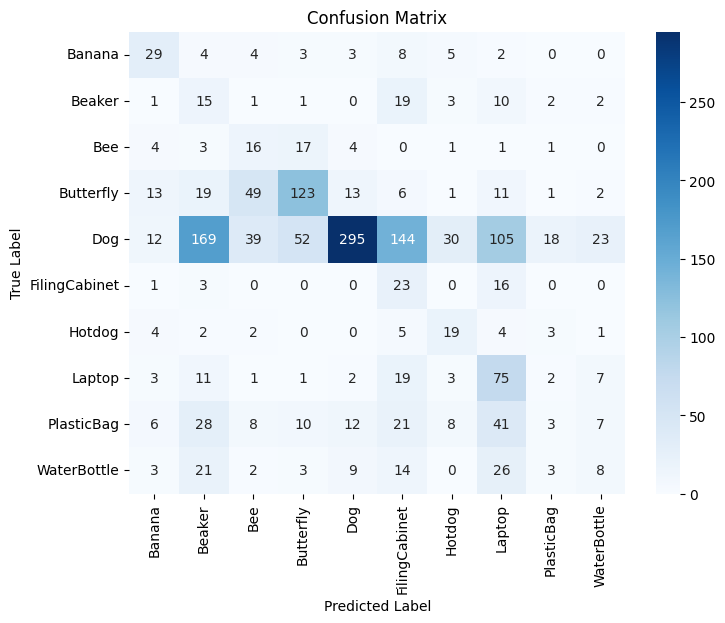

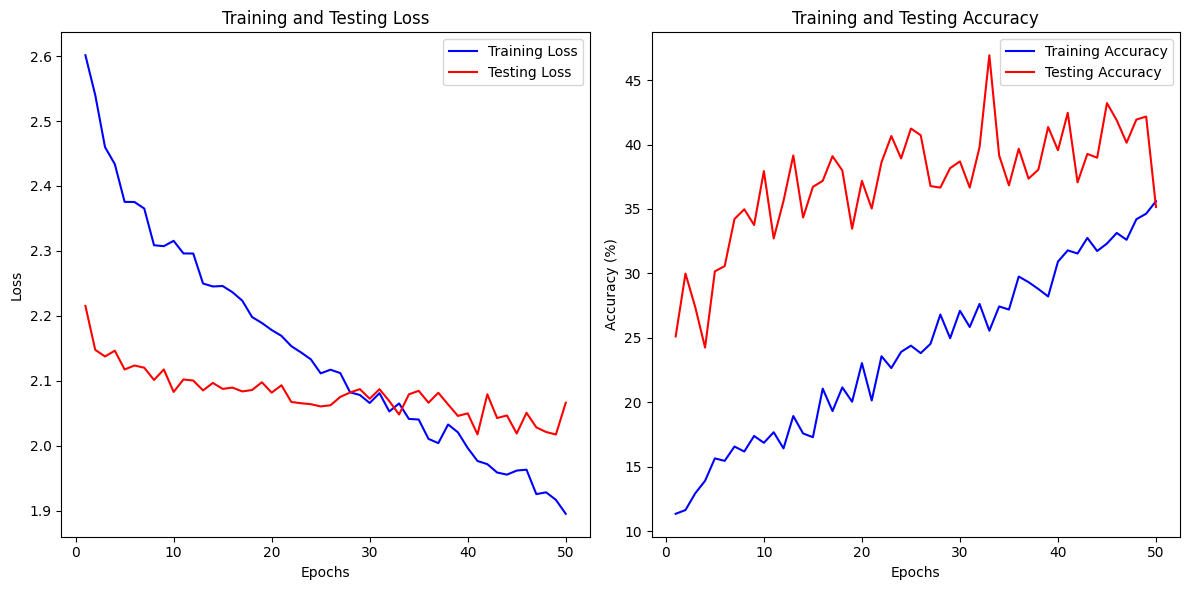

In [11]:
best_loss = 1000
best_model_states = {}

model = models.CNNRegBN(NUM_CLASSES).to(DEVICE)
criterion = helpers.LabelSmoothingCrossEntropy()
optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=0.0025)

# ==== TRAINING SCHLEIFE ====
print("Starting Training...")
train_losses, train_accuracies = [], []
test_losses, test_accuracies = [], []
for epoch in range(NUM_EPOCHS):
    print(f"Epoch {epoch+1}/{NUM_EPOCHS}")
    
    # Train & test
    train_loss, train_acc = helpers.train(model, train_loader_balanced, criterion, optimizer, DEVICE)
    test_loss, test_acc, all_preds, all_labels = helpers.test(model, test_loader, criterion, DEVICE)

    # Ergebnisse speichern
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%")
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

    # Speichern des besten Modells
    if test_loss < best_loss:
        best_loss = test_loss
        best_model_states = model.state_dict()

print("Training Complete!")

print("Evaluation with best model")
model.load_state_dict(best_model_states)  # Laden des besten Modells
model.to(DEVICE)
test_loss, test_acc, all_preds, all_labels = helpers.test(model, test_loader, criterion, DEVICE)

helpers.plot_confusion_matrix(all_labels, all_preds, classes=class_labels)
helpers.plot_training_history(train_losses, test_losses, train_accuracies, test_accuracies)

**Frage: Was zeigen uns die Ergebnisse der letzten beiden Tests? Was funktioniert besser, alle Daten oder die reduzierten, bei welchen alle Objekte gleich oft vorkommen?**

In [16]:
# Code von Einheit 2, lediglich das Modell wurde ausgetauscht

import cv2

camera = cv2.VideoCapture(0) # Start der Camera

model = helpers.load_model("best_overall_cnn.pth", models.CNNRegBN, NUM_CLASSES, DEVICE)  # Laden des besten Modells
model.eval()  # Setzen von eval: Modell wird nicht mehr trainiert sondern nur verwendet

while True:
    error, frame = camera.read()
    if not error:
        break

    labels = model.predict(frame, DEVICE, class_labels)  

    # Wir geben das Label links oben im Bild aus
    cv2.putText(frame, labels[0], (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Und zeigen die Kamera an
    cv2.imshow("Top Vorhersage", frame)

    # Wenn die q Taste gedrückt wird, beenden wir die Endlosschleife
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()